# Investigation of Rectified Linear Unit (ReLU) Activation Function

In this document, we investigate the rectified linear unit (ReLU) activation function in using neural networks to classify brain tumours.

**Table of Contents**
1. Requirements
2. Mathematical Background on Neural Networks
3. Mathematical Background on ReLU Activation
4. Investigation of ReLU Activation
5. Conclusion

# 1. Requirements

We load the required packages below.

# 2. Neural Network

A neural network (NN) is a machine learning model inspired by how the *human brain* works (see [16, 20] for a detailed history, including the work of McCullogh and Pitts, the development of the perceptron, and more). In this document, we come full circle, as we use it to classify brain tumours!

## 2.1. Basics

We explain the basics of neural networks, using information from [17, 18]. A neural network (NN) is composed of layers of interconnected nodes called **neurons**. These neurons are organized in three main layers:

- **Input layer**: This is where data enters the network. Each input feature (e.g., pixels of an image or values in a dataset) corresponds to one neuron in this layer.
- **Hidden layers**: These intermediate layers perform the actual processing. Each neuron in a hidden layer receives inputs from the previous layer, applies a mathematical operation (known as an **activation function**), and passes the result to the next layer.
- **Output layer**: This layer produces the network's final output or prediction, such as a classification label.

Collectively, this is called the **architecture** of the NN. This is shown in the Figure below.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*L1bH8PUeLf67Aat-h5phpw.png" alt="Figure taken from Medium Article - accessed 10/11/2024." title="Beautiful Sunset">
    <figcaption>Figure showing the architecture of a neural network. Figure taken from <a href="https://miro.medium.com/v2/resize:fit:1400/1*L1bH8PUeLf67Aat-h5phpw.png">Medium Article</a> - accessed 10/11/2024 08:37.</figcaption>
</figure>

# 2.2. Mathematical formulation

To understand how this works mathematically, we give an example and provide an analogy to the human nervous system. Consider a neuron $i$ in a hidden or output layer. It receives inputs from previous-layer neurons $a_j$, with respective outputs $x_{a_j}$. Each input is **weighted** before passing through an activation function $f$. Mathematically, we write the output of neuron $i$ as:

$$
f(W_{0,i} + \sum_{j} W_{j,i} x_{a_j}).
$$

Here, $W_{0,i}$ is a bias term, and the $W_{j,i}$ values are weights. The bias term can be thought of as a neuron $a_0$ that always provides a signal $x_{a_0} = 1$, helping to adjust the activation function's behavior by situating the output signal in the appropriate range [18].

This mimics the biological neuron, which takes *signals* (the $x_{a_j}$ here) from other neurons (say we take in signals relating to taste, sight, touch, hearing and emotions) and based on the phenomenon (e.g. if you are eating, taste and touch are most important) there is a certain **importance** of each signal (the **weights**, which we will call $W_{i,j}$). The signal will be processed into some other signal (this is the part where we pass to the activation function) and then transmitted (this is where we output to the next layer).

For our tumour classification task, we are going to make use of a special kind of neural network: the convolutional neural network.

# 2.3. Convolutional Neural Network

A convolutional neural network (CNN) is a specialized type of neural network. CNNs are especially good at image-related tasks (like recognizing objects in pictures) because they can detect patterns and spatial hierarchies in data, such as edges, textures, and shapes [24]. They are even compared to the way the brain achieves vision processing in living organisms like cats [23]. They are the "de-facto standard" [19] in image processing, though in some cases newer architectures like transformers are being favoured. The picture below summarizes how they work.

<figure>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/183560-qcmbdpukpdviccdd-66c7065d8f850.webp" alt="Figure from Analytics Vidhya - accessed 10/11/2024.">
    <figcaption>Figure from <a href="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/183560-qcmbdpukpdviccdd-66c7065d8f850.webp">Analytics Vidhya</a> - accessed 10/11/2024.</figcaption>
</figure>

We explain this in words, focussing on the concepts rather than technical details. We present how CNNs work, synthesizing information from [25, 26, 27]. The way they work are:

1. Input: Instead of connecting every input to every neuron, CNNs use small filters, or kernels, that slide over the image to detect features. Each filter is essentially a small matrix (e.g. 3x3), which multiplies and sums pixel values (mathematically, this is a dot product) in small regions of the input image. This process mimics the way our vision works. Work by Hubel and Wiesel in the 1950s and 1960s showed that neurons related to vision individually respond to small regions of the visual field for cats [19] and therefore the kernel scans small regions of the image. The output of the convolutional neuron is sometimes called a feature map [19] or activation map [25].

    Linking back to the previous section, we can see an example of a tensor: the image input is a tensor with shape (number of inputs) × (input height) × (input width) × (input channels (3 if RGB)) [19]. In the image below, we show the action of a convolutional kernel on parts of a 64 x 64 image.

<figure>
  <img src="https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_detailedview_demo.gif" alt="Convolutional Layer Demo">
  <figcaption>Figure showing a detailed view of a convolutional layer in action. GIF taken from [25]. </figcaption>
</figure>

The kernels have some hyper-parameters, called padding, kernel size and stride. We explain this below, synthesizing information from [25].
- Padding: When a filter extends beyond the edge of the activation map, padding is used to preserve data at the borders. Techniques to do this vary. A simple padding method is zero-padding, which involves adding zeroes around the edges of the input. This technique is frequently employed in high-performing CNNs, such as AlexNet (60 million parameters, 650,000 neurons [27]). This helps in maintaining spatial dimensions and improves performance [26]. In essence, it is like augmenting the image so that we can extract information from the corners and edges better. Other padding techniques can be found in an accessible tutorial in [28].

- Kernel Size: Also known as the filter size, kernel size defines the dimensions of the sliding window used to scan over the input. This hyperparameter greatly impacts feature extraction:

    - Smaller kernels (e.g., 3x3) capture finer, highly localized features, allowing for deeper architectures with more complex feature hierarchies. This smaller reduction in layer dimensions enables stacking more layers, which can enhance performance on tasks like image classification.
    - Larger kernels (e.g., 7x7) capture broader, more generalized features, leading to faster reductions in layer dimensions but often resulting in less detailed feature extraction.

- Stride: The stride determines the step size by which the kernel moves across the input. For example, a stride of 1 moves the kernel one pixel at a time, covering more of the input and producing larger output layers. This slower, more thorough process allows for detailed feature extraction but requires more computation. Conversely, a larger stride (e.g., 2 or more) moves the kernel further with each step, reducing the number of computations but resulting in smaller output layers and potentially less feature detail.

2. Feature detection: Each filter is designed to recognize specific patterns, like edges or textures. As the filter slides across the image (a process called convolution), it creates the feature map, highlighting areas where the pattern is detected. We can see this above, as the shape of the cup has been found, and the "non-cup" part (the liquid inside) is also identified.

<figure>
  <img src="https://i.sstatic.net/pLlwx.png">
  <figcaption>Figure showing an example of Feature Maps. Here we use 2 filters and get 2 feature maps.</figcaption>
</figure>


3. Multiple filters: CNNs use multiple filters in each convolutional layer. The first layer might detect basic patterns, like edges, while later layers combine these simpler patterns into more complex shapes or features.

4. Pooling: After a convolutional layer, a pooling layer reduces the spatial size of the feature maps [26], which decreases the number of parameters and computations. For example, in max pooling (the most common type), a small window slides over the feature map and takes the maximum value in each window. This effectively "summarizes" the strongest features in each area.

5. Stacking layers: In a CNN, multiple convolutional and pooling layers are stacked one after another. As data moves through each layer, the network learns increasingly abstract and complex features. Early layers detect simple patterns like edges, while deeper layers detect complex shapes and objects.

5. After the convolutional and pooling layers, the feature maps are “flattened” (converted into a 1D vector) and fed into a fully connected, or FC layers (these are also called dense layers). This layer combines features from all previous layers to make the final prediction.

We have only provided a brief overview of how CNNs work. Some work in the literature study in detail what the CNN does - and in particular [40] studies how CNNs "see depth" in images.

CNNs have key advantages [29, 30] which make them especially good for image processing. We provide a brief summary below:
- Automatic feature learning: CNNs can automatically learn relevant features from raw input data, which eliminates the need for manual feature engineering.
- High accuracy: CNNs can achieve state-of-the-art performance in various image and video recognition tasks.
- Robustness: Using data augmentation (see later section), CNNs can have high performance even if the images have different qualitative features, such as being taken with different brightness, contrast or angles.

Despite their many advantages, CNNs also have some disadvantages. The one we felt the most was the high computational requirement -- CNNs required significant computational resources, including the use of GPUs (graphics processing units) (see later section on parallelism with GPUs) or TPUs (tensor processing units) to train and deploy. It can also be prone to overfitting and can fail with adversarial examples when some noise is added to an image [29]. We now move onto the training process. We explain how training is done using backpropagation and (stochastic) gradient descent.

# 3. Training using Backpropagation

## 3.1. Gradient Descent
The training process in neural networks involves adjusting the weights and biases through backpropagation combined with gradient descent. When the network makes a mistake, the error is propagated backward, and the weights are updated to minimize the error. Gradient descent optimizes by adjusting weights in the direction that reduces the *loss function* the most. The "learning rate" refers to how far along the gradient we move, i.e. it is a sort of step size. The loss function measures the discrepancy between the predicted output and actual output, and therefore repeating these weight updates over many units of time, or "epochs," generally improves the network's accuracy in making predictions.

<figure>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp" alt="Figure taken from Analytics Vidhya - accessed 10/11/2024.">
    <figcaption>Figure showing the process of gradient descent. Figure taken from <a href="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp">Analytics Vidhya</a> - accessed 10/11/2024.</figcaption>
</figure>

<figure>
    <img src="https://i.makeagif.com/media/12-08-2023/g4oDOp.gif" alt="GIF demonstrating Stochastic Gradient Descent">
    <figcaption>Figure showing the process of backpropagation. Figure taken from [https://makeagif.com/gif/backpropagation-on-neural-networks-g4oDOp](makeagif.com) - accessed 11/11/2024. </figcaption>
</figure>

Note that there is a lot of information about layers and neurons to be stored, as each neuron $a_i^{\ell}$ in each layer $\ell$ will have weights $W_{j,i}^{\ell}$ for the inputs from neurons $a_{j}^{\ell -1}$ from the previous layer. Hence, we need a lot of indices to store this information. To do this effectively, we use *tensors* [19].

Tensors are generalizations of matrices ($A = (a_{ij})$) and vectors ($a = (a_i)$) to higher dimensions [21]. For example, "rank 0" tensors are scalars, "rank 1" tensors are vectors, and "rank 2" tensors are matrices. When adding more dimensions, we call the corresponding quantity a rank $n$ tensor. Using tensors, we can write out the backpropagation process in a compact form. We direct the interested reader to [22] if they wish to see a mathematical formulation of backpropagation.

In short, neural networks learn patterns in data by adjusting the connections between their neurons. Tensors provide a compact way to organise the information about the weights and neurons, allowing us to express backpropagation mathematically in a compact way. (This explains both `Tensor` and `flow` in `Tensorflow` -- a particular platform that we will use to fit NNs.) The traditional gradient descent approach uses all data points to compute the gradient in each backpropagation step. This becomes computationally expensive with large datasets, as it requires going through the entire dataset to perform just one weight update. An alternative, called *stochastic gradient descent*, provides a computationally cheaper way to optimise the loss function.

## 3.2. Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) was first introduced by Herbert Robbins and Sutton Monro in their 1951 paper, "[A Stochastic Approximation Method](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-22/issue-3/A-Stochastic-Approximation-Method/10.1214/aoms/1177729586.full) [31]." Although they did not specifically apply the method to neural networks (which were not yet developed in their modern form), Robbins and Monro's work laid the foundation for the iterative optimization techniques used in machine learning today.

SGD differs from traditional gradient descent by randomly selecting a small subset of data points (called a batch) and uses this subset to approximate the gradient. This has the benefit of being computationally faster as the code can make use of vectorization libraries, making it better suited for larger datasets. Typical implementations may use an adaptive learning rate so that the algorithm converges [32]. Note that an "epoch" refers to a pass through all the data, as in traditional gradient descent. Hence lower batch sizes need more iterations for one epoch of training. For example, if we have 1000 samples and a batch size of 500, we need 2 iterations for 1 epoch of training [32].

SGD has been analyzed using the theories of convex minimization and of stochastic approximation [31]. When the learning rates decrease with an appropriate rate, stochastic gradient descent converges to a global minimum with probability 1 (under some conditions) when the objective function is convex, and otherwise converges to a local minimum. While our loss function is unlikely to be convex, this provides us with reassurance that SGD is a principled method. In fact, it is widely used throughout the deep learning community.

Having explained the principles of a convolutional neural network, we now move to considering the use of the ReLU activation function.



# 4. The Rectified Linear Unit

## 4.1. Definition
The rectified linear unit is the function defined by $$f(x) = \max\{0, x\}.$$ A plot of this function is produced below.

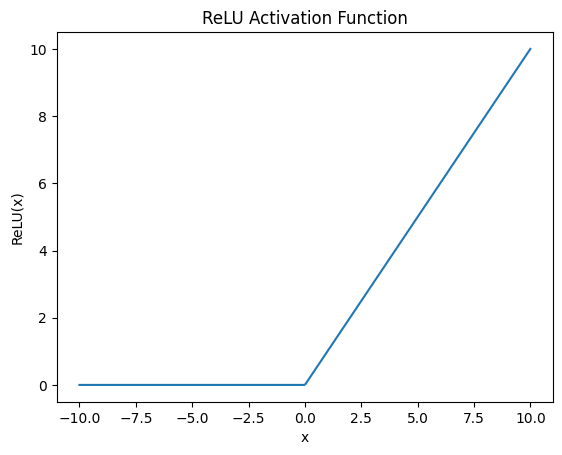

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values and corresponding ReLU values
x = np.linspace(-10, 10, 400)
y = relu(x)

# Plot
plt.plot(x, y, label="ReLU")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.title("ReLU Activation Function")
plt.grid(False)
plt.show()


As motivation for why we would be interested in the ReLU, we investigate its history (Section 4.2), features and advantages (Section 4.3). To better equip us in gaining insight from our empirical investigations in Section 5 and beyond, we also look at the disadvantages (Section 4.4).

## 4.2. History

The ReLU was first used by Alston Householder in 1941 as a mathematical abstraction of biological neural networks (those in the human nervous system rather than the deep learning method) [11]. It was introduced by Kunihiko Fukushima in 1969 to extract visual features using a neural network [12]. This seminal paper gives an insight into how the biological nervous system has led to the idea of a neural network. In particular, the ReLU works similar to a biological neuron, which either fires a signal or not. This matches the form of the ReLU, which has a positive signal for $x > 0$ and no signal otherwise.

As of 2017, ReLU is the most popular activation function for deep neural networks [7]. ReLUs are used widely, with applications in computer vision (the field concerned with the analysis and processing of images) [8], speech recognition [9], biology and neuroscience [10]. It is therefore an apt choice for our problem of classifying brain tumours.

## 4.3. Features of ReLU

In the literature, ReLU is noted to have several useful features and advantages. We summarise them below, using sources [7, 13, 14]:
- Non-linearity: Non-linearity is essential to work as an activation function. This is because a neural network essentially works by composition of functions, and linear functions are closed under composition. To see this, note that if $g(x) = ax + b$ then $$g(g(x)) = g(ax+b) = a(ax+b) + b = a^2 x + (ab  + b),$$ which is another linear function -- so overall we can simplify the network to just a linear function. Non-linearities are therefore essential.
- Sparse activation: In a randomly initialized network, only about 50% of hidden units are activated (have a non-zero output). Sparsity in matrices is extremely useful, as algorithms that can leverage sparsity are much faster [15] than other algorithms of the same type.
- Fewer "vanishing gradient" problems: There are fewer so-called "vanishing gradient" problems compared to sigmoidal activation functions that saturate in both directions [7]. We explain what the "vanishing gradient" problem is with an example, and try to understand why the ReLU may be more resistant to it than sigmoidal activation functions.

    - Note that the ReLU function is idempotent, meaning that $f(f(x)) = f(x)$. This is clearly seen by a calculation, since

    $$
    f(f(x)) = f(0) = 0 \text{ if } x < 0 \text{ and } f(f(x)) = f(x) = x \text{ if } x \geq 0.
    $$

    - This property is very important for deep neural networks as many layers mean that many compositions of $f$ will happen. To contrast the idempotence of the ReLU, consider functions such as the sigmoid and hyperbolic tangent. Such functions "squash" their inputs. This leads to flat regions for more values of $ x$, resulting in the vanishing gradient problem: derivatives approach zero as the number of repeated compositions approaches infinity [13]. We illustrate this below.
    - The output of the code cell below shows the sigmoid function becoming almost flat over the whole range plotted, and the hyperbolic tangent becoming flatter. However, the idempotence of the ReLU means that there is no "flattening". Hence, the vanishing gradient problem may be less severe (but we will note a problem called "dying ReLU" later, so it should be noted that the ReLU is not completely impervious to the vanishing gradient problem).

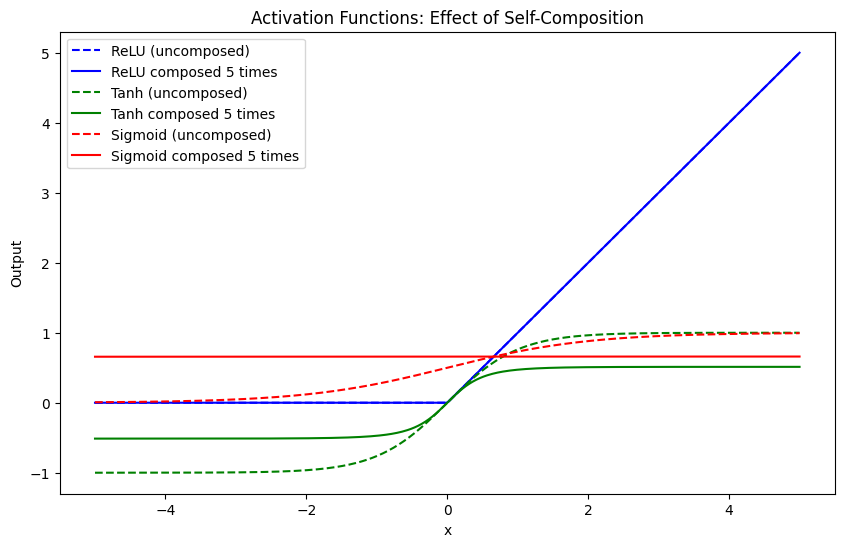

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def sigmoid(x): return 1 / (1 + np.exp(-x))

# Apply the activation function n times
def apply_composed(func, x, n=5):
    for _ in range(n):
        x = func(x)
    return x

# Generate x values
x = np.linspace(-5, 5, 400)

# Define activation functions and their colors
functions = [relu, tanh, sigmoid]
function_names = ["ReLU", "Tanh", "Sigmoid"]
colors = ["blue", "green", "red"]

# Plotting
plt.figure(figsize=(10, 6))
for func, name, color in zip(functions, function_names, colors):
    y = func(x)
    y_composed = apply_composed(func, x, n=5)
    plt.plot(x, y, label=f"{name} (uncomposed)", color=color, linestyle="--")
    plt.plot(x, y_composed, label=f"{name} composed 5 times", color=color)

# Adding labels and title
plt.title("Activation Functions: Effect of Self-Composition")
plt.xlabel("x")
plt.ylabel("Output")
plt.legend()
plt.grid(False)
plt.show()


- Another useful feature of the ReLU is that it is efficient to compute. It only requires a comparison and addition, without needing exponentiation or division. The gradient is also very efficient to compute, since it is just 1 for $x > 0 $ and 0 for $x < 0$. These have led to empirical observations that NNs with ReLU activations are quick to train [30]. We will be assessing this statement during our investigation.

- It is also scale-invariant, in the sense that $f(ax) = af(x)$ for any constant $a \geq 0$. While this does not have much practical relevance for us, it is a useful property that is actively researched to improve neural networks using the ReLU (see for example [29] which designs a stochastic gradient descent algorithm that leverages the scale invariance.)

- One advantage of the ReLU can be the biological plausibility: ReLU resembles the activation patterns in biological neurons, which either fire (activate) or remain inactive, making it intuitively appealing. In fact, the original justification for ReLus was that biological neurons either fire (positive signal) or not (0 signal) [29].

These advantages partly explain ReLU's popularity in applications. However, it is not without its faults, as we see next.

# 4.4 Disadvantages of ReLU
Below, we explain some disadvantages of the ReLU. We again compile and interpret information from resources, namely [13, 14, 15].
- Non-differentiable at zero: The value of the derivative at zero can be arbitrarily chosen to be 0 or 1.

- Not zero-centered: ReLU outputs are always non-negative. This can make it harder for the network to learn during backpropagation because gradient updates tend to push weights in one direction (positive or negative). Some sources such as [14] suggest ways to deal with this, namely batch normalization. For brevity, this technique will not be a focus of this text, and the reader is invited to consult [33] for an accessible tutorial on batch normalization.

In addition to the non-zero-centered nature of ReLU, it is also unbounded, meaning its output can increase indefinitely for large positive inputs. This can lead to extremely large values in the network, which can cause numerical instability and potentially hinder the model's ability to generalize. Techniques such as weight regularization (e.g., L2 regularization) and gradient clipping can help manage these issues by preventing excessively large weights and activations.

- Unbounded Outputs: With large positive values, ReLU can produce high-magnitude outputs, potentially leading to "blow up" the activation function [30].

- "Dying ReLU" [14]: Note that the ReLU takes value 0 for negative inputs. Hence, ReLU neurons can sometimes be pushed into states in which they mostly output 0, hence becoming inactive for most inputs. In this state, no gradients flow backward through the neuron, and so the neuron becomes stuck in a perpetually inactive state and "dies". This is a form of the "vanishing gradient" problem. Some solutions proposed modifying the ReLU, leading to activations like the Swish (see the section on Swish and [34]) and "leaky ReLU", which has a small negative gradient for $x < 0$ [35].

This concludes our exploration of the ReLU. Armed with this information, we now seek to understand how the parameters of a neural network affect it when using the ReLU activation function in the intermediate layers. To do this, we will use some brain tumour data from Kaggle [1].

# 5. Data

# 5.1. Loading
The data contains around 7000 images of brain MRI scans (see EDA file for detailed description and explanation). We will be repeating the preprocessing in the EDA file. The reader is invited to consult the EDA file for descriptions on the image processing techniques used below, such as dilatation and erosion.

In [1]:
from pathlib import Path  # Import pathlib to work with paths
import kagglehub
import os  # Import os module for file operations
import hashlib
import numpy as np
from tqdm import tqdm
import cv2
import os
import imutils

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

# Convert path to a Path object
path = Path(path)

# Define your project directory and labels based on your dataset structure
PROJECT_DIR = path
LABELS = ['pituitary', 'notumor', 'meningioma', 'glioma']  # Adjust these labels based on your dataset's folder names

def crop_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    return new_img


# Convert 'path' to Path object (already done above)
train_dir = path / "Training"
test_dir = path / "Testing"

if __name__ == "__main__":
    training = train_dir
    testing = test_dir

    training_dir = os.listdir(training)
    testing_dir = os.listdir(testing)

    IMG_SIZE = 256

    for dir in training_dir:
        save_path = Path('cleaned/Training') / dir  # Using pathlib's '/' operator
        path = training / dir  # Using pathlib's '/' operator
        image_dir = os.listdir(path)

        for img in image_dir:
            image = cv2.imread(str(path / img))  # Convert Path to string for OpenCV
            new_img = crop_img(image)
            new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))

            if not save_path.exists():
                save_path.mkdir(parents=True)

            cv2.imwrite(str(save_path / img), new_img)  # Convert Path to string for OpenCV

    for dir in testing_dir:
        save_path = Path('cleaned/Testing') / dir
        path = testing / dir
        image_dir = os.listdir(path)

        for img in image_dir:
            image = cv2.imread(str(path / img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))

            if not save_path.exists():
                save_path.mkdir(parents=True)

            cv2.imwrite(str(save_path / img), new_img)


100%|██████████| 149M/149M [00:00<00:00, 170MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


# 6. Data Augmentation

# 6.1. Purpose of Data Augmentation

To properly investigate our chosen question, we will be splitting the data using a train-validation-test split. This means that we will have a limited amount of data. To remedy this, we will perform data augmentation: this is a process used to overcome the problem of limited quantity and diversity of data. We explain what data augmentation is below, synthesizing material from [1, 3, 4, 5, 6].

Data augmentation refers to generating artificial data to allow the neural network (or any machine learning model in general) to generalize better during the testing (or deployment) phase [1]. Its origins can be traced back to when CNNs were gaining popularity in mid-1990s. Then, there was a lack of data to use, especially considering that some part of the overall dataset should be spared for later testing. It was proposed to perturb existing data with affine transformations to create new examples with the same labels [6], leading to data augmentation techniques, which are still widely used as of 2010s [8]. Data augmentation leads to image data with good diversity (different positions, angles, brightness and so on) and hence allows us to achieve generalisability.

There are several types of perturbations possible, including geometric transformations, zooms, and changing the brightness and contrast.

# 6.2. Performing Data Augmentation
To perform the data augmentation, we will use `ImageDataGenerator` [3] from `keras` to rescale the pixel values, do geometric transformations (rotations, flips, shears, zooms) of images and more.

In [2]:
from pathlib import Path  # Import pathlib to work with paths
import kagglehub
import os  # Import os module for file operations
import hashlib
import numpy as np
from tqdm import tqdm
import cv2
import imutils
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define directories for training and testing images
train_dir = Path('cleaned/Training')
test_dir = Path('cleaned/Testing')

# Number of classes
LABELS = ['pituitary', 'notumor', 'meningioma', 'glioma']

# Image size and batch size
IMG_SIZE = 64  # Resize images to 64x64
BATCH_SIZE = 32

# Setup ImageDataGenerators for loading and preprocessing the images
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in and out
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest',  # Fill any missing pixels using the nearest pixel
    brightness_range=(0.5, 1.5),  # Randomly adjust brightness between 0.5 and 1.5 times the original
    channel_shift_range=20.0,  # Randomly shift RGB channels (intensity)
    validation_split=0.2  # Use 20% of the training data for validation
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

# Load images from directories using ImageDataGenerator
print('Training Data: ')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset = 'training',
    shuffle=True
)
print('Validation Data: ')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset = 'validation',
    shuffle=True
)
print('Testing Data: ')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for test data
)


Training Data: 
Found 4571 images belonging to 4 classes.
Validation Data: 
Found 1141 images belonging to 4 classes.
Testing Data: 
Found 1311 images belonging to 4 classes.


We explain what each of the arguments in `ImageDataGenerator` does, using the documentation [3].

1. Rotation: rotates images randomly. This helps the model learn to recognize features regardless of their orientation. This is particularly useful as we have seen some images where the subject of the image might be positioned at different angles (brain scans that are slightly tilted).

2. Width and height Shift: randomly shifts images horizontally (for width) and vertically (for height). This helps the model learn to recognize features regardless of their position. For example, if a brain tumor is off-center, this augmentation allows the model to still recognize it.

3. Shear: applies a shearing transformation, which skews the image in a way that one side `slants' towards the other. This helps the model recognize objects that might be deformed or angled in an unusual way. This can simulate slight distortions that might occur in real-world imaging data.

4. Zoom: randomly zooms into the image by up to 20%. This helps the model to learn from both close-up and wide-view perspectives of the features. This helps in our case as the brain tumours may be different sizes.

5. Horizontal Flip: flips the image horizontally with a 50% chance. This helps the model to be invariant to the left-right orientation of features. In cases where tumors or other key structures are equally likely to be on either side, this augmentation is helpful.

6. Fill Mode (fill_mode='nearest'): this parameter makes `keras` fill in pixels created by transformations like shifts and rotations by ensuring that new pixels introduced by transformations take the value of the nearest pixel, which can help preserve context and continuity at image edges.

7. Brightness Range: adjusts the brightness of the image randomly within the specified range, helping the model learn to recognize features under varying lighting conditions, which simulates different imaging conditions and improves the model's robustness.

8. Channel Shift Range: since images are grayscale, this effectively acts as a contrast adjustment. By shifting pixel values uniformly, it either darkens or lightens the image.

We show a sample of images that result from the data augmentation.

Selected random image: cleaned/Training/notumor/Tr-no_0672.jpg


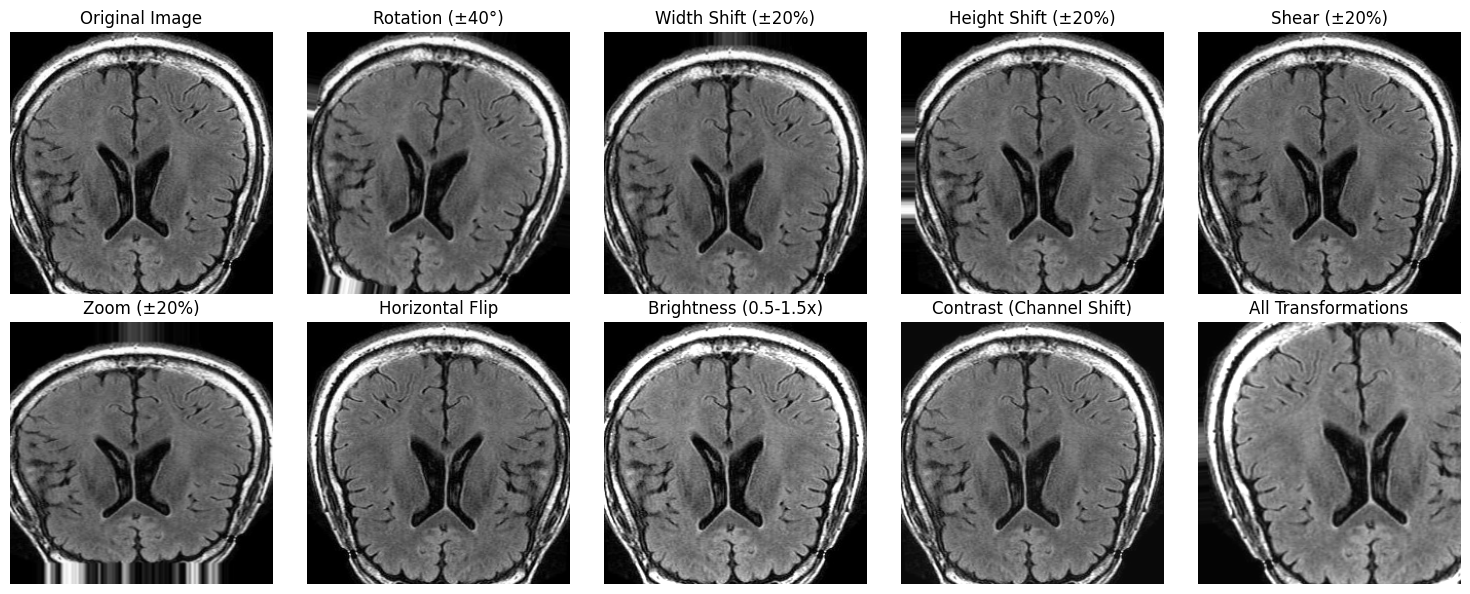

In [ ]:
import random
import numpy as np
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# Set a fixed seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

# Define the train directory
train_dir = Path('cleaned/Training')

# Get all label subdirectories (e.g., pituitary, notumor, etc.)
label_dirs = [d for d in train_dir.iterdir() if d.is_dir()]

# Choose a random label directory and a random image within it
# Uncomment the following lines to randomly select an image
# random_label_dir = random.choice(label_dirs)
# image_files = list(random_label_dir.glob('*.jpg'))  # Assuming images are in .jpg format
# random_image_path = random.choice(image_files)
random_image_path = "cleaned/Training/notumor/Tr-no_0672.jpg"  # Manually specify an image path

# Load the chosen random image
img = load_img(random_image_path)  # Load the image
img_array = img_to_array(img)      # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension for generator

# Print selected image path
print(f"Selected random image: {random_image_path}")

# Function to display augmented images in rows, starting with the original image
def display_augmented_images_with_original(datagen_dict, img_array, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    axes = axes.flatten()  # Flatten to iterate easily

    # Display the original image in the first slot
    axes[0].imshow(img_array[0].astype('uint8'), cmap='gray')  # Assuming grayscale images
    axes[0].axis('off')
    axes[0].set_title("Original Image")

    # Display each augmentation in the remaining slots
    for ax, (title, datagen) in zip(axes[1:], datagen_dict.items()):
        augmented_images = datagen.flow(img_array, batch_size=1, seed=seed)
        aug_img = next(augmented_images)[0].astype('uint8')  # Generate one augmented image
        ax.imshow(aug_img, cmap='gray')  # Assuming grayscale images
        ax.axis('off')
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

# Define individual augmentations as datagen instances with titles (excluding Fill Mode only)
datagen_dict = {
    "Rotation (±40°)": ImageDataGenerator(rotation_range=40),
    "Width Shift (±20%)": ImageDataGenerator(width_shift_range=0.2),
    "Height Shift (±20%)": ImageDataGenerator(height_shift_range=0.2),
    "Shear (±20%)": ImageDataGenerator(shear_range=0.2),
    "Zoom (±20%)": ImageDataGenerator(zoom_range=0.2),
    "Horizontal Flip": ImageDataGenerator(horizontal_flip=True),
    "Brightness (0.5-1.5x)": ImageDataGenerator(brightness_range=(0.5, 1.5)),
    "Contrast (Channel Shift)": ImageDataGenerator(channel_shift_range=20.0),
    "All Transformations": ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range=(0.5, 1.5),
        channel_shift_range=20.0
    )
}

# Display the original image followed by augmentations in a 2x5 grid
display_augmented_images_with_original(datagen_dict, img_array)


We can see that the code indeed produces the augmentations that they claim to do. Note that the values next to the transformation only indicate the range of the transformations performed. To clarify, "Rotation ($\pm$ 40 degrees)" means that a rotation of up to 40 degrees clockwise or anticlockwise is performed. We emphasize that this is not necessarily a rotation of exactly 40 degrees.

We can see distortions in the rotation and zoom images. This highlights the importance of using the `fill_mode` parameter in `keras`, which will prevent such things from happening, as we can see in the last image which used a random combination of augmentations along with `fill_mode`.

Overall, we can conclude from this image that `ImageDataGenerator` works reasonably, and we work with this without qualms for the rest of the text.

# 7. Investigations

In our exploration of CNNs, we have seen that they are powerful models particularly well-suited for tasks involving image data. The practical implementations of NNs have far outpaced theoretical developments. Indeed, [38] mentions how "our theoretical understanding of their properties is still partial at best". Indeed, from earlier sections, we have already seen several things which can affect a CNN's performance, namely:

- Number of layers (depth of network):
- Number of neurons (width of layers)
- Types of layers:
    - Convolutional layer: These layers also have hyperparameters. Recall that convolutional layers have filters (kernels) that slide over the image to create feature maps. The kernels have parameters which affect them:
        - the filter size (size of the field over which the network learns spatial features),
        - the number of filters,
        - the stride: the step size with which the filter moves across the image,
        - padding: the process preserves the spatial dimensions by adding pixels around the input - there are many types of padding.
    - Pooling layers: these reduce spatial dimensions to make the model computationally efficient and mitigate overfitting.
- The learning rate: recall that this is the "step size" in the (stochastic) gradient descent.
- The number of epochs in training: recall that an epoch is a full pass through the data.
- The batch size: this will determine the time taken to complete an epoch of training.

Understanding the role and impact of each of these parameters is essential for optimizing CNN performance and achieving high accuracy in our application. We will here perform an investigation of the properties of NNs. We next describe the setup and goals of our investigation.

# 7.1 Setup and Goals

We use the same train-test-validate split throughout, using the data augmentation techniques described earlier. We seek to understand the impact of the parameters on performance, and so we do not attempt a sequential optimization of parameters here. Throughout, we will make use of a GPU from [Google Colab](https://colab.research.google.com/).  We will investigate the following parameters:
- depth
- bach size
- learning rate
- ADD AS U GO

# 7.2 Depth and Width

The effects of width on neural network performance have been discussed in several studies [37-42, Cheng et al., 2016; Chen and Liu, 2017; Zagoruyko and Komodakis, 2016]. These studies highlight that width and depth are two of the most fundamental parameters in designing neural networks, and understanding how they interact is crucial for improving model performance.

In such literature, we seek to answer a fundamental question about what a model can and cannot learn [38]. The key idea is that depth (more function compositions) can give a highly oscillatory function. On the other hand, adding nodes but keeping depth fixed is something like function addition and gives a function with few oscillations. The mathematical argument given for this is relatively simple and is given in [Section 3.3, 37] and can be visualized by the reader in this [Desmos](https://www.desmos.com/calculator/6o4ab3bun6) [43] widget we prepared. It is proven in [37] that low-oscillation functions cannot approximate high-oscillation functions, so indeed there is a "gap" between the approximability of some functions for networks of different depths. This is formalized in [37] where it is shown that for any $k \in \mathbb{Z}^+$, there are networks with $\Theta(k^3)$ layers with $\Theta(1)$ neurons per layer that cannot be approximated by networks with $\Theta(k)$ layers unless they have exponentially many neurons per layer.

Empirical evidence indicates that having depth in a neural network is "indeed important" [39]. Indeed, deep networks may be able to capture more complex patterns, which, intuitively, may seem more difficult for shallow architectures to capture. However, we note observations in [37, 38, 39] that there are surprisingly few formal results on this. While "it is well-known that sufficiently large [author's note: wide] depth-2 neural networks, using reasonable activation functions, can approximate any continuous function on a bounded domain" [39, 44], our empirical investigation has value in that we contribute to an understanding of the interaction of depth and width of the chosen dataset.

While we here focus on CNNs, we point out that investigation of depths and width of neural networks have connections to the wider literature. We point out that there have been significant research results for feedforward [39, 44], graph [46] and recurrent neural networks [45], as well as more recently for Transformers and Neural GPUs [39, 46]. We also note that investigating depths in neural networks have connections [37, 40] with Boolean circuits. In particular, the circuit complexity community has developed "depth hierarchy theorems" [37] that establishes the inapproximability of certain functions by shallow circuits (unless they have exponentially many nodes).

HHaving briefly reviewed some of the literature on neural network depth, we implemented an empirical investigation to assess the effects of convolutional layer depth on model performance.

# Shallow Depths
We started with depths ranging from 1 to 5 convolutional layers, systematically increasing the number of filters as the depth grew to explore how the network complexity impacted its ability to learn from the data. In our architecture, we used max-pooling after each convolutional layer to reduce the size of the feature maps, which helped control the model’s size and computational cost. However, as we added more layers, this pooling caused the feature maps to shrink too much. In our first try with 5 layers, the model couldn’t fit because there wasn’t enough detail left in the feature maps.

We considered other approaches, like pooling less often or only at the end of the convolutions, which is common in VGG-like architectures (see Figure 1). These methods keep the spatial resolution higher for longer, allowing the model to capture more detailed features, but they also require more memory and computation. Because of our limitations, we decided to keep pooling after each layer. We also felt it would be "fairer" that every layer gets a max pooling layer.

<figure style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*few2VVEzn6DMVX-kofszhA.png"
         alt="Descriptive Alt Text"
         style="width:100%; max-width:700px;">
    <figcaption style="font-style: italic; color: gray;">Figure 1: Image describing VGG-like architectures.</figcaption>
</figure>

The key solution came when we switched from using "valid" padding to "same" padding. "Valid" padding shrinks the feature map as it moves through the layers, but "same" padding keeps the size the same at each layer, which helped preserve the resolution. This small change made a big difference, allowing our deeper models to train properly while keeping the computational demands manageable.

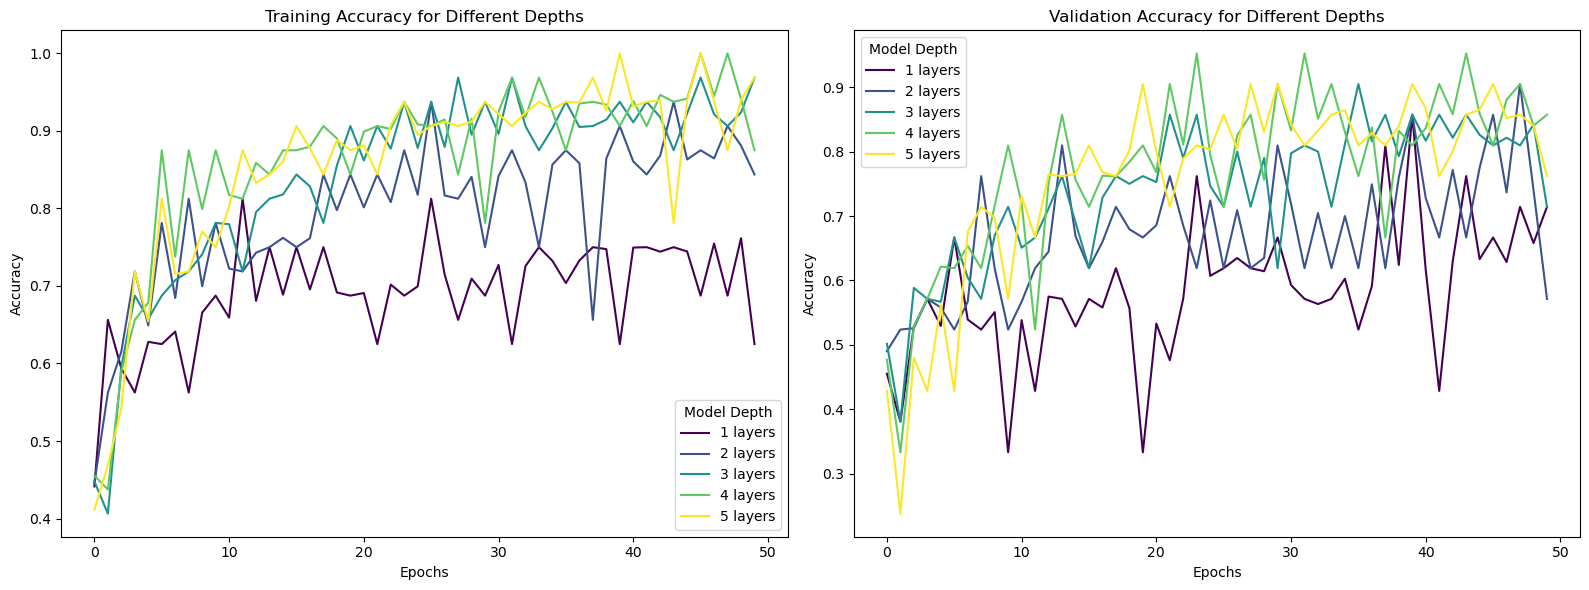

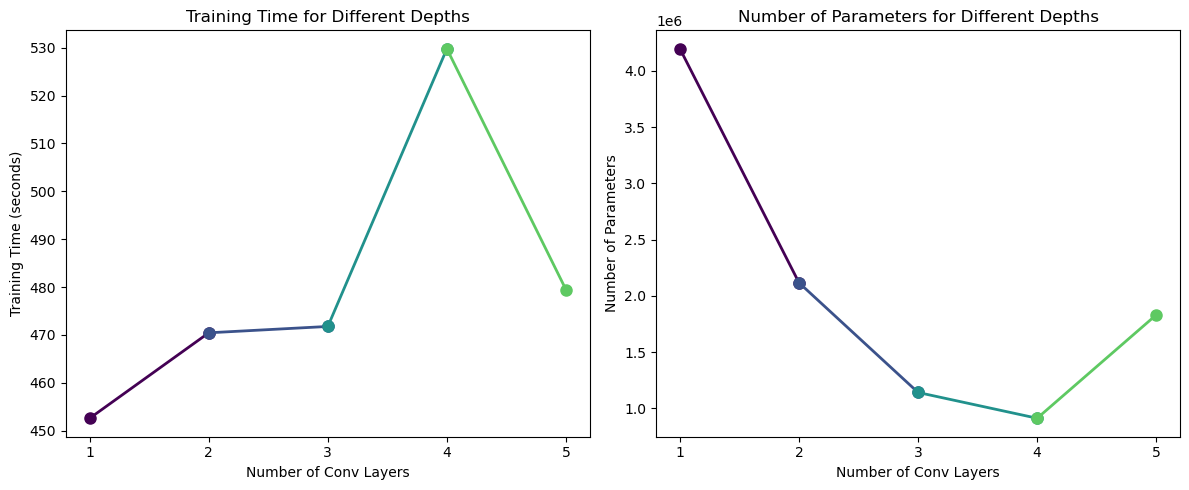

In [ ]:
import os
import json
import time
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Parameters
IMG_SIZE = 64
NUM_CLASSES = len(LABELS)
EPOCHS = 50
BATCH_SIZE = 32

# Directory to save models and histories
save_dir = 'model_saves'
os.makedirs(save_dir, exist_ok=True)

# Function to build CNN model with varying depth
def build_cnn_model(num_conv_layers, img_size, num_classes, filter_base=32, dense_units=128):
    model = models.Sequential()
    for i in range(num_conv_layers):
        filters = filter_base * (2**i)
        if i == 0:
            # First layer specifies input shape
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
        else:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Loop through depths, including 1 conv layer, train, evaluate, and save results
for num_conv_layers in range(1, 6):  # Testing depths from 1 to 5 conv layers
    model_path = os.path.join(save_dir, f"model_depth_{num_conv_layers}.keras")
    history_path = os.path.join(save_dir, f"history_depth_{num_conv_layers}.json")

    # Check if the model and history for this depth already exists
    if os.path.exists(model_path) and os.path.exists(history_path):
        print(f"Model and history with {num_conv_layers} layers already exist, skipping training...")

        # Ask the user if they want to proceed with training
        user_input = input(f"Results for {num_conv_layers} layers already exist. Do you want to fit the model again? (y/n): ").strip().lower()
        if user_input != 'y':
            print(f"Skipping model fitting for {num_conv_layers} layers.")
            continue
    else:
        print(f"\nTraining model with {num_conv_layers} convolutional layers...\n")

    # Build model with specified depth
    model = build_cnn_model(num_conv_layers, IMG_SIZE, NUM_CLASSES)

    # Track training time
    start_time = time.time()

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE
    )

    # Calculate training time
    training_time = time.time() - start_time
    print(f"Training time for {num_conv_layers} conv layers: {training_time:.2f} seconds")

    # Save the model in TensorFlow's SavedModel format
    model.save(model_path)  # This saves in the 'tf' format by default
    print(f"Model with {num_conv_layers} convolutional layers saved as {model_path}")

    # Save training history
    history_data = {
        "accuracy": history.history["accuracy"],
        "val_accuracy": history.history["val_accuracy"],
        "loss": history.history["loss"],
        "val_loss": history.history["val_loss"],
        "training_time": training_time
    }
    with open(history_path, 'w') as file:
        json.dump(history_data, file)
    print(f"Training history saved as {history_path}")

import json
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from matplotlib.cm import viridis

# Directory where models and history are saved
save_dir = 'model_saved/depths'

# Initialize lists for plotting
training_times = []
num_parameters = []
depth_accuracy_data = []

# Depths to analyze (from 1 to 5 layers)
depths = range(1, 6)

# Load model and history for each depth
for num_conv_layers in depths:
    model_path = os.path.join(save_dir, f"model_depth_{num_conv_layers}.keras")
    history_path = os.path.join(save_dir, f"history_depth_{num_conv_layers}.json")

    if os.path.exists(model_path) and os.path.exists(history_path):
        # Load the model to retrieve the number of parameters
        model = load_model(model_path)
        num_parameters.append(model.count_params())

        # Load history data
        with open(history_path, 'r') as f:
            history_data = json.load(f)
            depth_accuracy_data.append({
                'depth': num_conv_layers,
                'train_accuracy': history_data['accuracy'],
                'val_accuracy': history_data['val_accuracy']
            })
            training_times.append(history_data['training_time'])
    else:
        print(f"No model or history found for depth {num_conv_layers}.")

# Colors for different depths using the viridis colormap
colors = viridis(np.linspace(0, 1, len(depth_accuracy_data)))

# Create subplots for training and validation accuracy
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training Accuracy
for i, data in enumerate(depth_accuracy_data):
    axs[0].plot(data['train_accuracy'], color=colors[i], label=f'{data["depth"]} layers', marker='')
axs[0].set_title('Training Accuracy for Different Depths')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(title='Model Depth')

# Plot Validation Accuracy
for i, data in enumerate(depth_accuracy_data):
    axs[1].plot(data['val_accuracy'], color=colors[i], label=f'{data["depth"]} layers', marker='')
axs[1].set_title('Validation Accuracy for Different Depths')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(title='Model Depth')

plt.tight_layout()
plt.show()

# Line plot for Training Time and Number of Parameters with viridis color gradient
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training Time line plot
for i in range(len(depths) - 1):
    ax1.plot(depths[i:i+2], training_times[i:i+2], color=colors[i], marker='o', linewidth=2, markersize=8)
ax1.set_xticks(depths)  # Ensure only specified depths are shown
ax1.set_title('Training Time for Different Depths')
ax1.set_xlabel('Number of Conv Layers')
ax1.set_ylabel('Training Time (seconds)')

# Number of Parameters line plot
for i in range(len(depths) - 1):
    ax2.plot(depths[i:i+2], num_parameters[i:i+2], color=colors[i], marker='o', linewidth=2, markersize=8)
ax2.set_xticks(depths)  # Ensure only specified depths are shown
ax2.set_title('Number of Parameters for Different Depths')
ax2.set_xlabel('Number of Conv Layers')
ax2.set_ylabel('Number of Parameters')

plt.tight_layout()
plt.show()


We were initially surprised with the number of parameters. The number of parameters was already in the millions, though we have fewer than 5 layers. The max-pooling seems to work quite effectively, reducing the number of parameters from 4 million to 1 million as depth increased from 1 to 4.

The increase in parameters at the end looked odd, and so we redid the investigation. The past investigation can be seen in a [past commit](https://github.com/vivekp12/dst-group-project-2/blob/88c73a1f6707bef4aa32e4c6f55418d15a94710c/VivekP/04-ReLUInvestigation.ipynb) and confirms that the increase is correct. This is probably due to the extra layer adding more parameters than was reduced by the max-pooling.

From the past investigation, we also could tell that the training times have outliers. The training times for 2 and 4 layers are higher than expected. It is unclear why this would be the case, as the same computing environment in Colab was used. We note that such things have been observed in past DST projects (see the data research section for a review) with no explanation provided. In general, we would expect the training time to increase monotonically with number of layers as the architecture gets more complex.

Unsurprisingly, the performance generally gets better with more layers. This is expected as the model is able to learn more complex patterns in the data with more depth.  We can perhaps see a saturation of the performance, as increasing the number of layers from 4 to 5 leads to little gain. We investigate this further by looking at deeper networks.

# 7.2.2 Deeper Networks

To *deepen* our investigation, we considered depths from 5 to 80. We made practical adjustments to handle the challenges of training very deep networks effectively.

First, we changed how the network’s width would grow. Previously, the number of filters doubled with each layer. For this study, we capped the filters at 32 after the first five layers. This kept the model manageable and allowed us to focus on how depth alone impacts performance. It also let us explore an interesting question raised in the literature: whether depth needs to be paired with exponentially increasing width for effective learning or if limited width suffices.

Next, we addressed the issue of pooling. In earlier experiments, we used max-pooling after every layer, which worked well for shallow networks. However, with deeper networks, this caused the feature maps to shrink too quickly, leaving little useful information (even if padding was changed). To fix this, we switched to global average pooling [48] when the feature maps became too small. This approach maintained the integrity of the data while keeping the networks efficient and avoiding excessive reductions in spatial resolution.

Finally, we added checkpoints during training. We expected training times to be longer, and interruptions could mean losing progress. By saving the model’s state at regular intervals, we ensured we could resume training without starting over. If a model had already completed training, we skipped it entirely, saving valuable time and effort while ensuring consistent results.

This setup enabled us to further pursue our question and see whether extremely deep networks (with bounded width) are worthwhile.

In [ ]:
import os
import json
import time
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# Parameters
IMG_SIZE = 64
NUM_CLASSES = len(LABELS)
EPOCHS = 50  # Target total epochs
BATCH_SIZE = 32

# Directory to save models, histories, and checkpoints
save_dir = 'model_saved/depths'
checkpoint_dir = 'checkpoints'
os.makedirs(save_dir, exist_ok=True)
os.makedirs(checkpoint_dir, exist_ok=True)

# Function to build CNN model with varying depth
def build_cnn_model(num_conv_layers, img_size, num_classes, filter_base=32, dense_units=128):
    model = models.Sequential()
    for i in range(num_conv_layers):
        filters = filter_base * (2**i if i < 5 else 32)
        if i == 0:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
        else:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))

        if img_size // (2 ** i) > 1:
            model.add(layers.MaxPooling2D((2, 2), padding='same'))
        else:
            model.add(layers.GlobalAveragePooling2D())
            break

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Loop through specified depths (5, 10, 20, 40, 80 conv layers)
for num_conv_layers in [5, 10, 20, 40, 80]:
    model_path = os.path.join(save_dir, f"model_depth_{num_conv_layers}.keras")
    history_path = os.path.join(save_dir, f"history_depth_{num_conv_layers}.json")
    checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_depth_{num_conv_layers}.weights.h5")

    # Build model with specified depth
    model = build_cnn_model(num_conv_layers, IMG_SIZE, NUM_CLASSES)

    # Load weights from checkpoint if available
    initial_epoch = 0
    if os.path.exists(checkpoint_path):
        print(f"Resuming from checkpoint: {checkpoint_path}")
        model.load_weights(checkpoint_path)

        # Load existing history and get the number of completed epochs
        if os.path.exists(history_path):
            with open(history_path, 'r') as file:
                history_data = json.load(file)
            completed_epochs = len(history_data["accuracy"])
            initial_epoch = min(completed_epochs, EPOCHS)  # Resume from where training left off

    # If training is already completed, skip
    if initial_epoch >= EPOCHS:
        print(f"Training already completed for model with {num_conv_layers} layers, skipping...")
        continue

    # Set up ModelCheckpoint to save weights during training
    checkpoint_callback = ModelCheckpoint(
        checkpoint_path,
        monitor='val_accuracy',
        save_best_only=False,
        save_weights_only=True,
        verbose=1
    )

    # Track training time
    start_time = time.time()

    # Continue training the model from initial_epoch to EPOCHS
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        initial_epoch=initial_epoch,  # Resume from the last completed epoch
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE,
        callbacks=[checkpoint_callback]
    )

    # Calculate training time
    training_time = time.time() - start_time
    print(f"Training time for {num_conv_layers} conv layers: {training_time:.2f} seconds")

    # Save the final model in TensorFlow's SavedModel format
    model.save(model_path)
    print(f"Model with {num_conv_layers} convolutional layers saved as {model_path}")

    # Update history data and save
    if os.path.exists(history_path):
        with open(history_path, 'r') as file:
            history_data = json.load(file)
    else:
        history_data = {}

    # Append new history to the existing one
    history_data.setdefault("accuracy", []).extend(history.history["accuracy"])
    history_data.setdefault("val_accuracy", []).extend(history.history["val_accuracy"])
    history_data.setdefault("loss", []).extend(history.history["loss"])
    history_data.setdefault("val_loss", []).extend(history.history["val_loss"])
    history_data["training_time"] = history_data.get("training_time", 0) + training_time  # Accumulate time

    with open(history_path, 'w') as file:
        json.dump(history_data, file)
    print(f"Updated training history saved as {history_path}")


The fit was successful, but we lost the number of parameters and did not have time to retrain. We now visualise the performance.

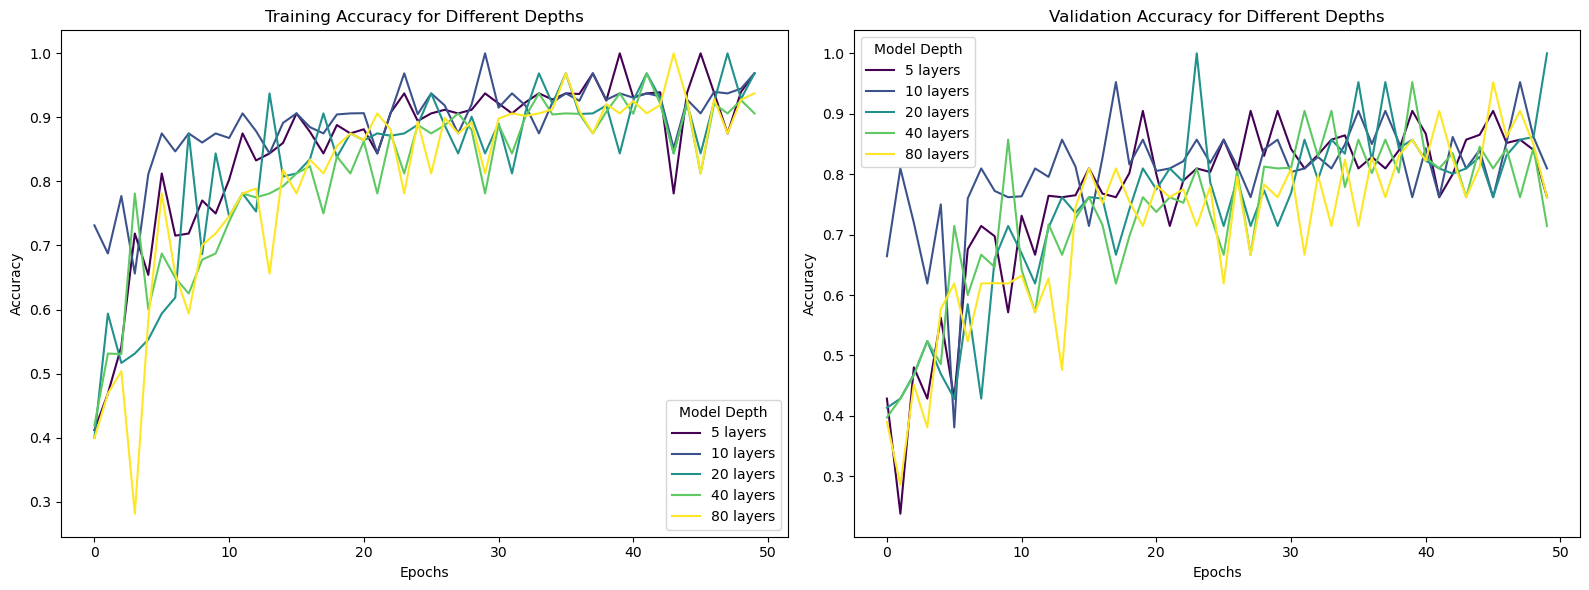

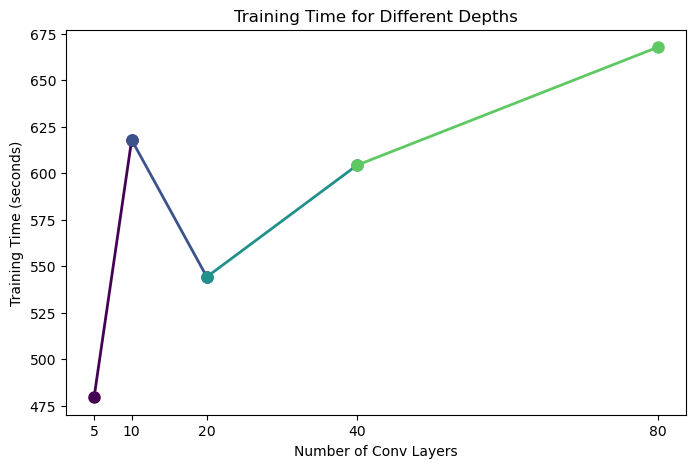

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Directory where history files are saved
save_dir = 'model_saved/depths'

# Lists for storing metrics
training_times = []
depth_accuracy_data = []

# Depths to analyze (5, 10, 20, 40, 80 conv layers)
depths = [5, 10, 20, 40, 80]

# Load history for each depth
for num_conv_layers in depths:
    history_path = os.path.join(save_dir, f"history_depth_{num_conv_layers}.json")

    if os.path.exists(history_path):
        # Load history data
        with open(history_path, 'r') as f:
            history_data = json.load(f)
            depth_accuracy_data.append({
                'depth': num_conv_layers,
                'train_accuracy': history_data['accuracy'],
                'val_accuracy': history_data['val_accuracy']
            })
            training_times.append(history_data['training_time'])
    else:
        print(f"No history found for depth {num_conv_layers}.")

# Colors for different depths using the viridis colormap
colors = viridis(np.linspace(0, 1, len(depths)))

# Create subplots for training and validation accuracy
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training Accuracy
for i, data in enumerate(depth_accuracy_data):
    axs[0].plot(data['train_accuracy'], color=colors[i], label=f'{data["depth"]} layers')
axs[0].set_title('Training Accuracy for Different Depths')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(title='Model Depth')

# Plot Validation Accuracy
for i, data in enumerate(depth_accuracy_data):
    axs[1].plot(data['val_accuracy'], color=colors[i], label=f'{data["depth"]} layers')
axs[1].set_title('Validation Accuracy for Different Depths')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(title='Model Depth')

plt.tight_layout()
plt.show()

# Line plot for Training Time with viridis color gradient
plt.figure(figsize=(8, 5))

# Plot each segment individually to apply the viridis color map along the line
for i in range(len(depths) - 1):
    plt.plot(depths[i:i+2], training_times[i:i+2], color=colors[i], marker='o', linewidth=2, markersize=8)

# Set custom x-ticks to reflect specific depth values
plt.xticks(depths, labels=depths)
plt.title('Training Time for Different Depths')
plt.xlabel('Number of Conv Layers')
plt.ylabel('Training Time (seconds)')
plt.show()


We were unfortunately unable to save the model parameters as we lost the `.keras` files as the Colab runtime timed out. We note that there is indeed a saturation of performance, and the validation accuracies do not seem to be getting better. We can also see another example of an anomalous runtime, with the training for 10 layers taking a long time.

Overall, we have learned a lot. We see that increasing depth allows the network to capture more complicated patterns, but after some point, there is a saturation of performance. Performance needs to be balanced with run-time costs. More complex networks not only take more time to train, but they also take more time to do prediction. However, we see that indeed very deep networks can work quite well even with bounded width.

We next *widen* our investigation, and explore the other "side" of the question: what happens with changes in width for a fixed depth?

# Width

We have previously highlighted that the effects of width have been discussed by many studies in the literature (see the depth section for references). In particular, we highlight that there are both width-bounded and depth-bounded universal approximators. We will now focus on trying to verify this statement. We partially looked at how width affects performance, as the shallow networks for depths $i = 1, \ldots , 5$ had $2^i$ filters. The focus of the investigation was however on depth and we saw good performance can be obtained for increasing depths with bounded width. Hence, we now focus on how performance is affected increasing width, with bounded depth.

In our case, the width is controlled by the number of filters. We will fix the depth at 3, and vary the number of filters. We will then study the effect on the performance, training time and number of parameters.

In [ ]:
import os
import json
import time
from tensorflow.keras import layers, models

# Parameters
fixed_depth = 3  # Fix depth to 3 convolutional layers
width_multipliers = [0.5, 1, 2, 4, 8]  # Define width multipliers for exploration
save_dir = 'model_saves'  # Directory to save models and histories
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Function to build CNN model with fixed depth and varying width
def build_cnn_model_fixed_depth(img_size, num_classes, width_multiplier=1, dense_units=128):
    model = models.Sequential()
    filter_base = 32  # Start with 32 filters as the base
    total_filters = 0  # Initialize a counter for total filters

    for i in range(fixed_depth):
        filters = int(filter_base * width_multiplier * (2 ** i))  # Scale filters with width_multiplier and layer depth
        total_filters += filters  # Accumulate the filters in each layer

        if i == 0:
            # First layer with input shape specified
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
        else:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))

        # Apply MaxPooling at each layer
        model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Continue with fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model, total_filters  # Return model and total number of filters

# Loop over different width multipliers
for width_multiplier in width_multipliers:
    print(f"\nTraining model with width multiplier {width_multiplier}...\n")
    model, total_filters = build_cnn_model_fixed_depth(IMG_SIZE, len(LABELS), width_multiplier=width_multiplier)

    # Get the total number of parameters in the model
    total_params = model.count_params()

    # Track training time
    start_time = time.time()

    # Train model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE
    )

    # Calculate training time
    training_time = time.time() - start_time

    # Save model and training history for each width multiplier
    model_path = os.path.join(save_dir, f"model_width_{width_multiplier}x.keras")
    model.save(model_path)

    # Save training history along with total filters, parameters, and training time as JSON
    history_path = os.path.join(save_dir, f"history_width_{width_multiplier}x.json")
    history_data = {
        "accuracy": history.history["accuracy"],
        "val_accuracy": history.history["val_accuracy"],
        "loss": history.history["loss"],
        "val_loss": history.history["val_loss"],
        "total_filters": total_filters,  # Store the total number of filters
        "total_params": total_params,  # Store the total number of model parameters
        "training_time": training_time  # Store the training time
    }
    with open(history_path, 'w') as file:
        json.dump(history_data, file)

    print(f"Model and history for width multiplier {width_multiplier} saved with total filters: {total_filters}, total params: {total_params}, and training time: {training_time:.2f} seconds.")



Training model with width multiplier 0.5...

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.3798 - loss: 1.2516 - val_accuracy: 0.4723 - val_loss: 1.2347
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.6954 - val_accuracy: 0.6190 - val_loss: 1.1122
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.5964 - loss: 0.9339 - val_accuracy: 0.5429 - val_loss: 1.1181
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5625 - loss: 0.9107 - val_accuracy: 0.6190 - val_loss: 0.9494
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.6860 - loss: 0.7638 - val_accuracy: 0.5964 - val_loss: 1.0319
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7188 - loss: 0.7465 - val_accuracy: 0.5714 - val_loss: 0.9868
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.6992 - loss: 0.7302 - val_accuracy: 0.6384 - val_loss: 0.9786
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15

We immediately ran into challenges. In fact, the time taken for computations was too high with 50 epochs. In fact, after 10 minutes for lowest multiplier, the computation was not done. We did wanted a *wide* investigation of width. Hence, to be able to explore a large number of filters, we reduced the number of epochs to 30 here.

The width was varied as follows. For depth $i$, the number of filters was chosen as $$\text{base number of filters (32)} \times \text{ multiplier} \times {2^i},$$ and the multiplier varied from 0.5, 1, 2, 4 to 8. We then successfully fitted the model, and we now make plots of the performance.

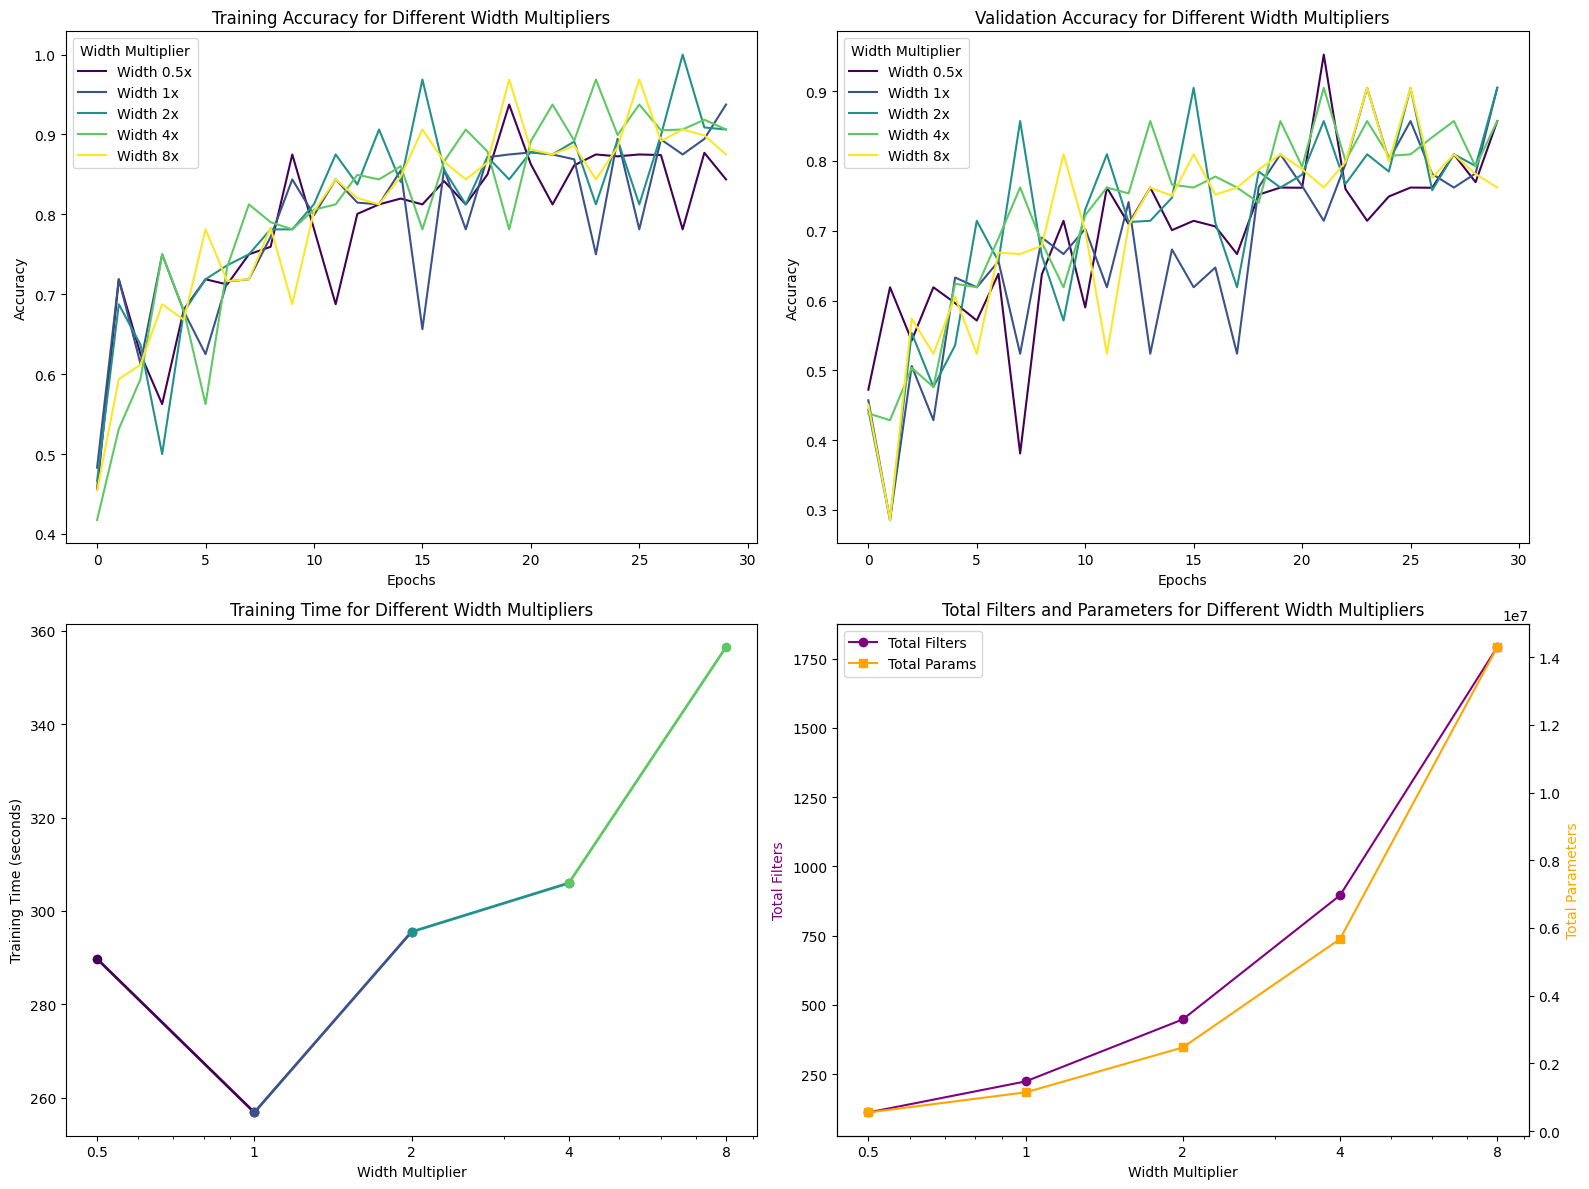

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Directory where history files are saved
save_dir = 'model_saves'

# Lists for storing metrics
width_multipliers = [0.5, 1, 2, 4, 8]
training_times = []
total_params = []
total_filters = []
accuracy_data = []

# Load history for each width multiplier
for width_multiplier in width_multipliers:
    history_path = os.path.join(save_dir, f"history_width_{width_multiplier}x.json")

    if os.path.exists(history_path):
        # Load history data
        with open(history_path, 'r') as f:
            history_data = json.load(f)
            accuracy_data.append({
                'width_multiplier': width_multiplier,
                'train_accuracy': history_data['accuracy'],
                'val_accuracy': history_data['val_accuracy']
            })
            training_times.append(history_data['training_time'])
            total_params.append(history_data['total_params'])
            total_filters.append(history_data['total_filters'])
    else:
        print(f"No history found for width multiplier {width_multiplier}.")

# Colors for different width multipliers using the viridis colormap
colors = viridis(np.linspace(0, 1, len(width_multipliers)))

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot Training Accuracy
for i, data in enumerate(accuracy_data):
    axs[0, 0].plot(data['train_accuracy'], color=colors[i], label=f'Width {data["width_multiplier"]}x')
axs[0, 0].set_title('Training Accuracy for Different Width Multipliers')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend(title='Width Multiplier')

# Plot Validation Accuracy
for i, data in enumerate(accuracy_data):
    axs[0, 1].plot(data['val_accuracy'], color=colors[i], label=f'Width {data["width_multiplier"]}x')
axs[0, 1].set_title('Validation Accuracy for Different Width Multipliers')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend(title='Width Multiplier')

# Plot Training Time with viridis color gradient
for i in range(len(width_multipliers) - 1):
    axs[1, 0].plot(width_multipliers[i:i+2], training_times[i:i+2], color=colors[i], marker='o', linewidth=2)

axs[1, 0].set_xscale('log')
axs[1, 0].set_xticks(width_multipliers)
axs[1, 0].set_xticklabels(width_multipliers)
axs[1, 0].set_title('Training Time for Different Width Multipliers')
axs[1, 0].set_xlabel('Width Multiplier')
axs[1, 0].set_ylabel('Training Time (seconds)')
axs[1, 0].grid(False)

# Plot Total Filters and Total Params with shared y-axis
ax2 = axs[1, 1].twinx()  # Create a twin y-axis
axs[1, 1].plot(width_multipliers, total_filters, marker='o', color='purple', label='Total Filters')
ax2.plot(width_multipliers, total_params, marker='s', color='orange', label='Total Params')

axs[1, 1].set_xscale('log')
axs[1, 1].set_xticks(width_multipliers)
axs[1, 1].set_xticklabels(width_multipliers)
axs[1, 1].set_xlabel('Width Multiplier')
axs[1, 1].set_ylabel('Total Filters', color='purple')
ax2.set_ylabel('Total Parameters', color='orange')
axs[1, 1].set_title('Total Filters and Parameters for Different Width Multipliers')

# Add legends
lines, labels = axs[1, 1].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axs[1, 1].legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


The results were again surprising. We found that the width did not have much of an effect of the performance, with all the training and test accuracy curves being close to each other. We see however that it takes more time to train the network. There is therefore a cost-performance ratio to balance here: we can make the network arbitrarily complex, but it may not do better. We also see that the number of filters is related to the number of parameters, as the curves have the same shape. We can see that the lowest width multiplier (0.1) had around $0.1 \times 10^7$ parameters (about a million) and the highest multiplier (8) had $1.4 \times 10^7$ (14 million) parameters. The number of filters and parameters are therefore approximately proportional to each other.

# 7.3 Batch size

In [ ]:
import os
import json
import time
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMG_SIZE = 64
NUM_CLASSES = len(LABELS)
EPOCHS = 30
batch_sizes = [4, 8]  # Only the remaining large batch sizes

# Directory to save histories
save_dir = 'model_saves_batch_size'
os.makedirs(save_dir, exist_ok=True)

# Function to build CNN model with fixed depth of 2 convolutional layers
def build_cnn_model(img_size, num_classes, filter_base=32, dense_units=128):
    model = models.Sequential()
    for i in range(2):  # Fixed depth of 2 conv layers
        filters = filter_base * (2**i)
        if i == 0:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
        else:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Loop through different batch sizes and train the model
for batch_size in batch_sizes:
    history_path = os.path.join(save_dir, f"history_batch_size_{batch_size}.json")

    # Check if history for this batch size already exists
    if os.path.exists(history_path):
        print(f"History with batch size {batch_size} already exists, skipping training...")
        continue

    print(f"\nTraining model with batch size {batch_size}...\n")

    # Reinitialize the model
    model = build_cnn_model(IMG_SIZE, NUM_CLASSES)

    # Get number of parameters
    num_params = model.count_params()
    print(f"Number of parameters for batch size {batch_size}: {num_params}")

    # Dynamically set steps per epoch and validation steps
    steps_per_epoch = max(1, train_generator.samples // batch_size)
    validation_steps = max(2, min(validation_generator.samples // batch_size, 5))  # Limit to avoid empty logs

    # Track training time
    start_time = time.time()

    # Train the model with early stopping
    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_steps,
    )

    # Calculate training time
    training_time = time.time() - start_time
    print(f"Training time for batch size {batch_size}: {training_time:.2f} seconds")

    # Save training history and parameters count
    history_data = {
        "accuracy": history.history["accuracy"],
        "val_accuracy": history.history["val_accuracy"],
        "loss": history.history["loss"],
        "val_loss": history.history["val_loss"],
        "training_time": training_time,
        "num_params": num_params,  # Save number of parameters
        "epochs_trained": len(history.history["loss"])  # Store actual epochs run
    }

    # Save history data to JSON
    with open(history_path, 'w') as file:
        json.dump(history_data, file)
    print(f"Training history and parameter count saved as {history_path}")



Training model with batch size 4...

Number of parameters for batch size 4: 2117188


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
 136/1142 ━━━━━━━━━━━━━━━━━━━━ 1:52 112ms/step - accuracy: 0.3889 - loss: 1.2543

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



1142/1142 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.4699 - loss: 1.1265 - val_accuracy: 0.4812 - val_loss: 1.1254
Epoch 2/30
1142/1142 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6155 - loss: 0.8707 - val_accuracy: 0.5500 - val_loss: 1.2662
Epoch 3/30
1142/1142 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6569 - loss: 0.8167 - val_accuracy: 0.5500 - val_loss: 1.1440
Epoch 4/30
1142/1142 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6957 - loss: 0.7435 - val_accuracy: 0.6812 - val_loss: 0.9353
Epoch 5/30
1142/1142 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7270 - loss: 0.6782 - val_accuracy: 0.6438 - val_loss: 1.0458
Epoch 6/30
1142/1142 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7506 - loss: 0.6269 - val_accuracy: 0.5938 - val_loss: 1.0271
Epoch 7/30
1142/1142 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7676 - loss: 0.5925 - val_accuracy: 0.6625 - val_loss: 0.9196
Epoch 

val_logs is likely None because your validation_generator has a property validation_steps with a value that is too small, so that no validation data can be used during the training. It could be that validation_steps is 0 or 1. This means that model.fit() is unable to calculate any validation metrics, causing it to return None for val_logs. When the program tries to iterate over val_logs.items() to create the validation dictionary, it fails due to val_logs being None.

AttributeError: 'NoneType' object has no attribute 'items'
This error typically happens when the model's fit function is expecting validation data, but the validation_data generator runs out of samples, resulting in an incomplete or empty val_logs. Since we're already dynamically setting validation_steps to ensure it aligns with the validation dataset size, this issue might be due to an insufficient number of samples to complete each epoch with the batch size provided.

Potential Solutions:
Set validation_steps explicitly: Set it to a smaller fixed value (e.g., 1) if the batch size causes an issue with the full dataset length.
Reduce the batch size further for validation steps: Use a smaller batch size for validation data to prevent the generator from running out of data.
Here’s how you could implement these changes:

by dynamically adjusting steps_per_epoch and validation_steps based on the number of samples in the generator. This approach will ensure that each epoch has a valid number of steps, preventing the model from running out of data.

Batch size less than 16 were abandoned. Batch size 1 would take 20+ mins for 1 epoch. Batch size 4 would take 5+ mins for 1 epoch.

UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)

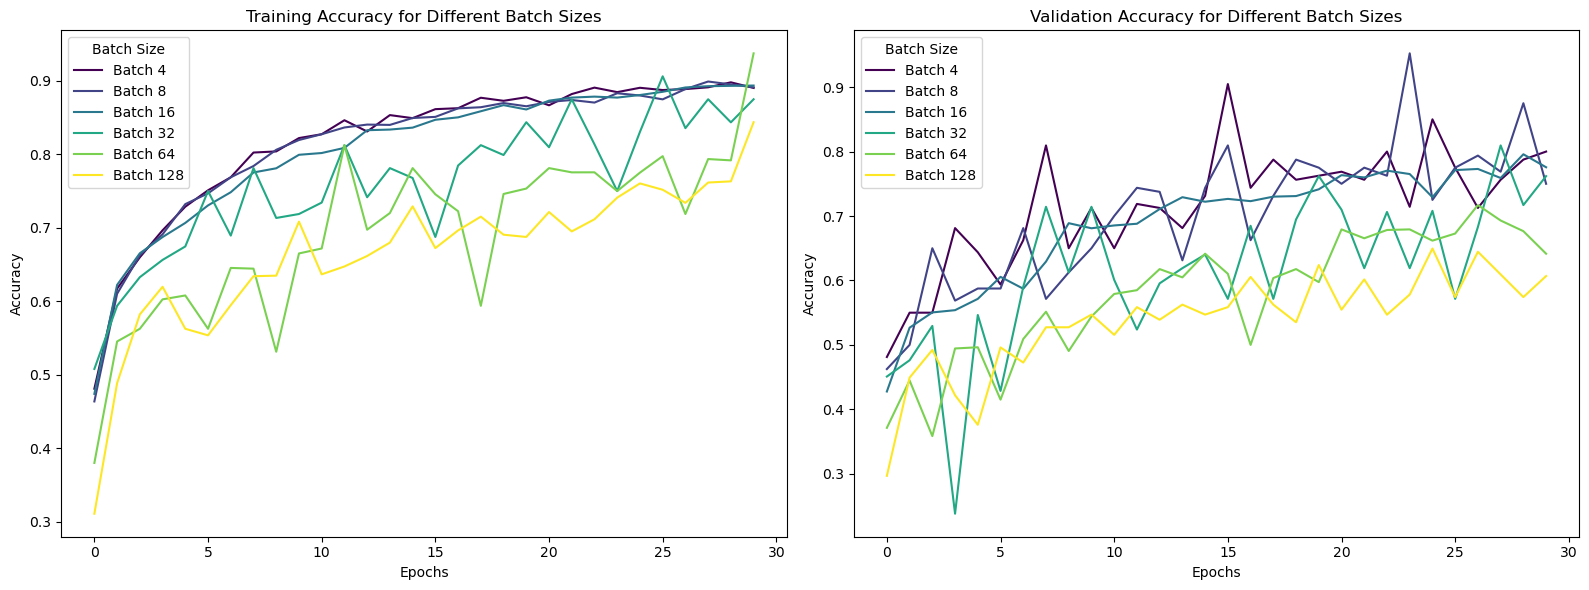

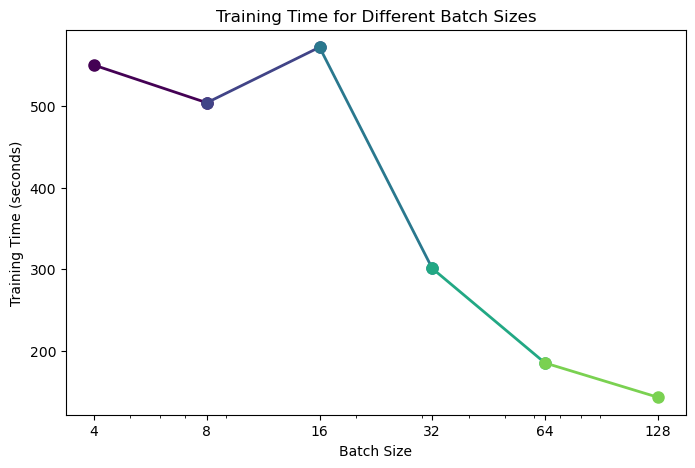

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Directory where history files are saved
save_dir = 'model_saved/batch-size'

# Lists for storing metrics
training_times = []
batch_size_accuracy_data = []

# Batch sizes to analyze (powers of 2 from 4 to 128)
batch_sizes = [4, 8, 16, 32, 64, 128]

# Load history for each batch size
for batch_size in batch_sizes:
    history_path = os.path.join(save_dir, f"history_batch_size_{batch_size}.json")

    if os.path.exists(history_path):
        # Load history data
        with open(history_path, 'r') as f:
            history_data = json.load(f)
            batch_size_accuracy_data.append({
                'batch_size': batch_size,
                'train_accuracy': history_data['accuracy'],
                'val_accuracy': history_data['val_accuracy']
            })
            training_times.append(history_data['training_time'])
    else:
        print(f"No history found for batch size {batch_size}.")

# Colors for different batch sizes using the viridis colormap
colors = viridis(np.linspace(0, 1, len(batch_sizes)))

# Create subplots for training and validation accuracy
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training Accuracy
for i, data in enumerate(batch_size_accuracy_data):
    axs[0].plot(data['train_accuracy'], color=colors[i], label=f'Batch {data["batch_size"]}')
axs[0].set_title('Training Accuracy for Different Batch Sizes')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(title='Batch Size')

# Plot Validation Accuracy
for i, data in enumerate(batch_size_accuracy_data):
    axs[1].plot(data['val_accuracy'], color=colors[i], label=f'Batch {data["batch_size"]}')
axs[1].set_title('Validation Accuracy for Different Batch Sizes')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(title='Batch Size')

plt.tight_layout()
plt.show()

# Line plot for Training Time with viridis color gradient and logarithmic x-axis
plt.figure(figsize=(8, 5))

# Plot each segment individually to apply the viridis color map along the line
for i in range(len(batch_sizes) - 1):
    plt.plot(batch_sizes[i:i+2], training_times[i:i+2], color=colors[i], marker='o', linewidth=2, markersize=8)

# Set x-axis to logarithmic scale and ensure batch size ticks are displayed
plt.xscale('log')
plt.xticks(batch_sizes, labels=batch_sizes)  # Show each batch size on the x-axis
plt.title('Training Time for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Training Time (seconds)')
plt.grid(False)

plt.show()


# 7.4 Learning Rate

Machine learning models based on deep neural networks have achieved unprecedented performance
across a wide range of tasks [1, 2, 3]. Typically, these models are regarded as complex systems for
which many types of theoretical analyses are intractable. Moreover, characterizing the gradient-based
training dynamics of these models is challenging owing to the typically high-dimensional non-convex
loss surfaces governing the optimization. As is common in the physical sciences, investigating the
extreme limits of such systems can often shed light on these hard problems. For neural networks,
one such limit is that of infinite width, which refers either to the number of hidden units in a fullyconnected layer or to the number of channels in a convolutional layer. Under this limit, the output of
the network at initialization is a draw from a Gaussian process (GP); moreover, the network output
remains governed by a GP after exact Bayesian training using squared loss [4, 5, 6, 7, 8]. Aside from
its theoretical simplicity, the infinite-width limit is also of practical interest as wider networks have
been found to generalize better [5, 7, 9, 10, 11].
In this work, we explore the learning dynamics of wide neural networks under gradient descent and
find that the weight-space description of the dynamics becomes surprisingly simple: as the width
becomes large, the

Gradient descent: the learning rate is the "step size". Adaptive recommended: Will try an annealing scheme. https://medium.com/@danielonugha0/how-to-change-the-learning-rate-of-tensorflow-b5d854819050

In [3]:
import os
import json
import time
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay, PiecewiseConstantDecay, PolynomialDecay, CosineDecay
from tensorflow.keras.optimizers import Adam

# Parameters
IMG_SIZE = 64
NUM_CLASSES = len(LABELS)
EPOCHS = 50
BATCH_SIZE = 32
INITIAL_LR = 0.001

# Directory to save models, histories, and checkpoints
save_dir = 'model_saved/lr_schedules'
checkpoint_dir = 'checkpoints_lr'
os.makedirs(save_dir, exist_ok=True)
os.makedirs(checkpoint_dir, exist_ok=True)

# Learning rate schedules
lr_schedules = {
    "constant": INITIAL_LR,
    "exponential_decay": ExponentialDecay(initial_learning_rate=INITIAL_LR, decay_steps=1000, decay_rate=0.96, staircase=True),
    "piecewise_constant": PiecewiseConstantDecay(boundaries=[10, 30], values=[INITIAL_LR, 0.0005, 0.0001]),
    "polynomial_decay": PolynomialDecay(initial_learning_rate=INITIAL_LR, decay_steps=EPOCHS * 100, end_learning_rate=0.0001, power=2.0),
    "cosine_decay": CosineDecay(initial_learning_rate=INITIAL_LR, decay_steps=EPOCHS * 100),
    "reduce_on_plateau": None  # Special case handled below
}

# Function to build CNN model
def build_cnn_model(img_size, num_classes, filter_base=32, dense_units=128):
    model = models.Sequential()
    for i in range(5):  # Fixed depth of 5 convolutional layers
        filters = filter_base * (2**i if i < 5 else 32)
        if i == 0:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
        else:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Train model with each learning rate schedule
for lr_name, lr_schedule in lr_schedules.items():
    model_path = os.path.join(save_dir, f"model_lr_{lr_name}.keras")
    history_path = os.path.join(save_dir, f"history_lr_{lr_name}.json")
    checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_lr_{lr_name}.weights.h5")

    # Build model
    model = build_cnn_model(IMG_SIZE, NUM_CLASSES)

    # Configure optimizer with learning rate schedule
    if lr_name == "reduce_on_plateau":
        optimizer = Adam(learning_rate=INITIAL_LR)
    else:
        optimizer = Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Set up callbacks
    callbacks = [
        ModelCheckpoint(
            checkpoint_path,
            monitor='val_accuracy',
            save_best_only=False,
            save_weights_only=True,
            verbose=1
        )
    ]
    if lr_name == "reduce_on_plateau":
        callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1))

    # Track training time
    start_time = time.time()

    # Train model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE,
        callbacks=callbacks
    )

    # Calculate training time
    training_time = time.time() - start_time
    print(f"Training time for {lr_name}: {training_time:.2f} seconds")

    # Save the final model
    model.save(model_path)
    print(f"Model with {lr_name} learning rate saved as {model_path}")

    # Save history
    history_data = {
        "accuracy": history.history["accuracy"],
        "val_accuracy": history.history["val_accuracy"],
        "loss": history.history["loss"],
        "val_loss": history.history["val_loss"],
        "training_time": training_time
    }
    with open(history_path, 'w') as file:
        json.dump(history_data, file)
    print(f"Training history for {lr_name} saved as {history_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3615 - loss: 1.3007
Epoch 1: saving model to checkpoints_lr/checkpoint_lr_constant.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.3622 - loss: 1.2996 - val_accuracy: 0.3750 - val_loss: 1.2972
Epoch 2/50
  1/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4688 - loss: 1.0665

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to checkpoints_lr/checkpoint_lr_constant.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4688 - loss: 1.0665 - val_accuracy: 0.3333 - val_loss: 1.1567
Epoch 3/50
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5205 - loss: 1.0048
Epoch 3: saving model to checkpoints_lr/checkpoint_lr_constant.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.5210 - loss: 1.0042 - val_accuracy: 0.4482 - val_loss: 1.3184
Epoch 4/50
  1/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6250 - loss: 0.9719
Epoch 4: saving model to checkpoints_lr/checkpoint_lr_constant.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 0.9719 - val_accuracy: 0.6667 - val_loss: 1.0266
Epoch 5/50
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6448 - loss: 0.8367
Epoch 5: saving model to checkpoints_lr/checkpoint_lr_constant.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - accuracy: 0.6451 - loss: 0.8362 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.3462 - loss: 1.2967
Epoch 1: saving model to checkpoints_lr/checkpoint_lr_exponential_decay.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - accuracy: 0.3472 - loss: 1.2952 - val_accuracy: 0.3884 - val_loss: 1.2527
Epoch 2/50
  1/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6250 - loss: 0.8917
Epoch 2: saving model to checkpoints_lr/checkpoint_lr_exponential_decay.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6250 - loss: 0.8917 - val_accuracy: 0.4286 - val_loss: 1.3240
Epoch 3/50
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5224 - loss: 1.0058
Epoch 3: saving model to checkpoints_lr/checkpoint_lr_exponential_decay.weights.h5
142/142 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.5227 - loss: 1.0053 - val_accuracy: 0.4875 - val_loss: 1.2693
Epoch 4/50
  1/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4688 - loss: 0.9753
Epoch 4: saving model to checkpoints_lr/chec

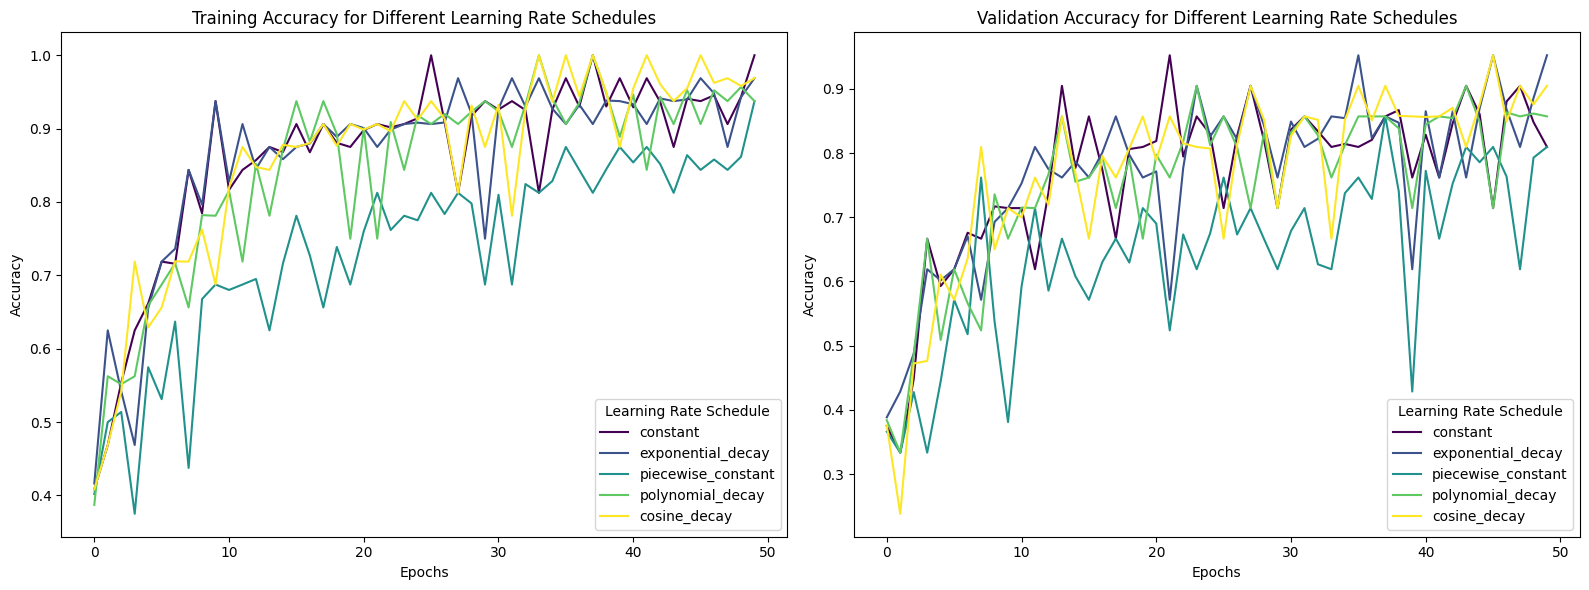

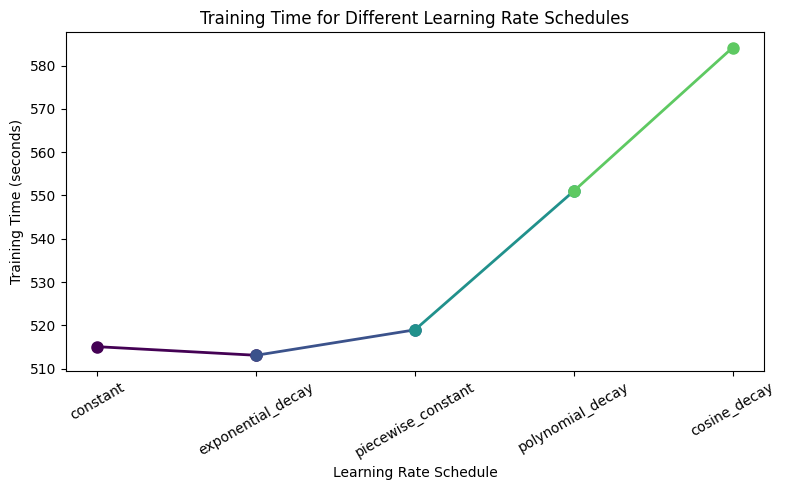

In [22]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Directory where history files are saved
save_dir = 'model_saved/lr_schedules'

# Lists to store metrics
lr_names = []
lr_accuracies = []
lr_val_accuracies = []
training_times = []

# Learning rate schedule names to analyze
lr_schedule_names = ["constant", "exponential_decay", "piecewise_constant", "polynomial_decay", "cosine_decay"]

# Load history for each learning rate schedule
for lr_name in lr_schedule_names:
    history_path = os.path.join(save_dir, f"history_lr_{lr_name}.json")

    if os.path.exists(history_path):
        # Load history data
        with open(history_path, 'r') as f:
            history_data = json.load(f)
            lr_names.append(lr_name)
            lr_accuracies.append(history_data['accuracy'])
            lr_val_accuracies.append(history_data['val_accuracy'])
            training_times.append(history_data['training_time'])
    else:
        print(f"No history found for learning rate schedule {lr_name}.")

# Colors for different learning rate schedules using the viridis colormap
colors = viridis(np.linspace(0, 1, len(lr_schedule_names)))

# Create subplots for training and validation accuracy
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training Accuracy
for i, lr_name in enumerate(lr_names):
    axs[0].plot(lr_accuracies[i], color=colors[i], label=lr_name)
axs[0].set_title('Training Accuracy for Different Learning Rate Schedules')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(title='Learning Rate Schedule')

# Plot Validation Accuracy
for i, lr_name in enumerate(lr_names):
    axs[1].plot(lr_val_accuracies[i], color=colors[i], label=lr_name)
axs[1].set_title('Validation Accuracy for Different Learning Rate Schedules')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(title='Learning Rate Schedule')

plt.tight_layout()
plt.show()

# Plot Training Times
plt.figure(figsize=(8, 5))

# Plot each segment individually to apply the viridis color map along the line
for i in range(len(training_times) - 1):
    plt.plot(lr_names[i:i + 2], training_times[i:i + 2], color=colors[i], marker='o', linewidth=2, markersize=8)

plt.title('Training Time for Different Learning Rate Schedules')
plt.xlabel('Learning Rate Schedule')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(False)

plt.tight_layout()
plt.show()


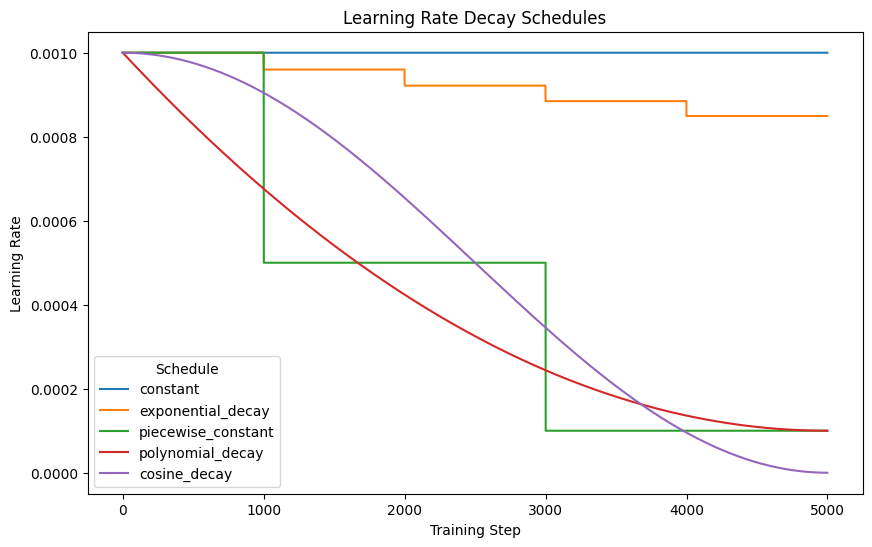

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.schedules import (
    ExponentialDecay,
    PiecewiseConstantDecay,
    PolynomialDecay,
    CosineDecay,
)

# Parameters
INITIAL_LR = 0.001
EPOCHS = 50
STEPS_PER_EPOCH = 100
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH

# Learning rate schedules
lr_schedules = {
    "constant": lambda step: INITIAL_LR,
    "exponential_decay": ExponentialDecay(
        initial_learning_rate=INITIAL_LR, decay_steps=1000, decay_rate=0.96, staircase=True
    ),
    "piecewise_constant": PiecewiseConstantDecay(
        boundaries=[10 * STEPS_PER_EPOCH, 30 * STEPS_PER_EPOCH],
        values=[INITIAL_LR, 0.0005, 0.0001]
    ),
    "polynomial_decay": PolynomialDecay(
        initial_learning_rate=INITIAL_LR, decay_steps=TOTAL_STEPS, end_learning_rate=0.0001, power=2.0
    ),
    "cosine_decay": CosineDecay(
        initial_learning_rate=INITIAL_LR, decay_steps=TOTAL_STEPS
    ),
}

# Generate steps and compute learning rates
steps = np.arange(TOTAL_STEPS)
lr_values = {name: [schedule(step) for step in steps] for name, schedule in lr_schedules.items()}

# Plot the learning rate schedules
plt.figure(figsize=(10, 6))
for name, lr in lr_values.items():
    plt.plot(steps, lr, label=name)

plt.title("Learning Rate Decay Schedules")
plt.xlabel("Training Step")
plt.ylabel("Learning Rate")
plt.legend(title="Schedule")
plt.grid(False)
plt.show()


# Regularization

In [13]:
import time
import numpy as np
from tensorflow.keras import regularizers

# Parameters
EPOCHS = 30  # Updated epochs
penalty_values = np.logspace(-7, 0, num=8).astype(np.float32)  # Ensure float32 consistency

# Directory to save results
l1_l2_save_dir = 'model_saved/regularization'
os.makedirs(l1_l2_save_dir, exist_ok=True)

# Function to build a CNN model with regularization
def build_regularized_cnn(img_size, num_classes, filter_base=32, dense_units=128, reg_type='l2', reg_value=0.01):
    if reg_type == 'l1':
        regularizer = regularizers.l1(float(reg_value))
    elif reg_type == 'l2':
        regularizer = regularizers.l2(float(reg_value))
    else:
        raise ValueError("reg_type must be 'l1' or 'l2'")

    model = models.Sequential()
    for i in range(5):  # Fixed depth of 5 convolutional layers
        filters = filter_base * (2**i if i < 5 else 32)
        if i == 0:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same',
                                    kernel_regularizer=regularizer, input_shape=(img_size, img_size, 3)))
        else:
            model.add(layers.Conv2D(filters, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
        model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Train models with different regularization strengths
for reg_type in ['l1', 'l2']:
    for reg_value in penalty_values:
        reg_name = f"{reg_type}_reg_{reg_value:.1e}".replace('.', '_')
        model_path = os.path.join(l1_l2_save_dir, f"model_{reg_name}.keras")
        history_path = os.path.join(l1_l2_save_dir, f"history_{reg_name}.json")

        # Build and compile model
        model = build_regularized_cnn(IMG_SIZE, NUM_CLASSES, reg_type=reg_type, reg_value=reg_value)
        model.compile(optimizer=Adam(learning_rate=INITIAL_LR),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Track training time
        start_time = time.time()

        # Train model
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,
            epochs=EPOCHS,  # Updated epochs
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE
        )

        # Calculate training time
        training_time = time.time() - start_time
        print(f"Training time for {reg_type} regularization (lambda={reg_value}) is {training_time:.2f} seconds")

        # Save the final model
        model.save(model_path)
        print(f"Model with {reg_type} regularization (lambda={reg_value}) saved as {model_path}")

        # Save training history
        history_data = {
            "accuracy": history.history["accuracy"],
            "val_accuracy": history.history["val_accuracy"],
            "loss": history.history["loss"],
            "val_loss": history.history["val_loss"],
            "training_time": training_time
        }
        with open(history_path, 'w') as file:
            json.dump(history_data, file)
        print(f"Training history for {reg_type} regularization (lambda={reg_value}) saved as {history_path}")


Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 32s 195ms/step - accuracy: 0.3462 - loss: 1.3074 - val_accuracy: 0.3509 - val_loss: 1.3520
Epoch 2/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3125 - loss: 1.1489

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.3125 - loss: 1.1489 - val_accuracy: 0.1905 - val_loss: 1.4968
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.5290 - loss: 1.0104 - val_accuracy: 0.4375 - val_loss: 1.2708
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5938 - loss: 0.7812 - val_accuracy: 0.6190 - val_loss: 1.1448
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.6326 - loss: 0.8429 - val_accuracy: 0.6107 - val_loss: 1.0844
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.7188 - loss: 1.1951 - val_accuracy: 0.6190 - val_loss: 1.0354
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.7108 - loss: 0.7108 - val_accuracy: 0.6268 - val_loss: 1.0346
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7812 - loss: 0.5103 - val_accuracy: 0.4286 - val_loss: 2.0282
Epoch 9/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.7942 - loss: 0.5497 - val_accur

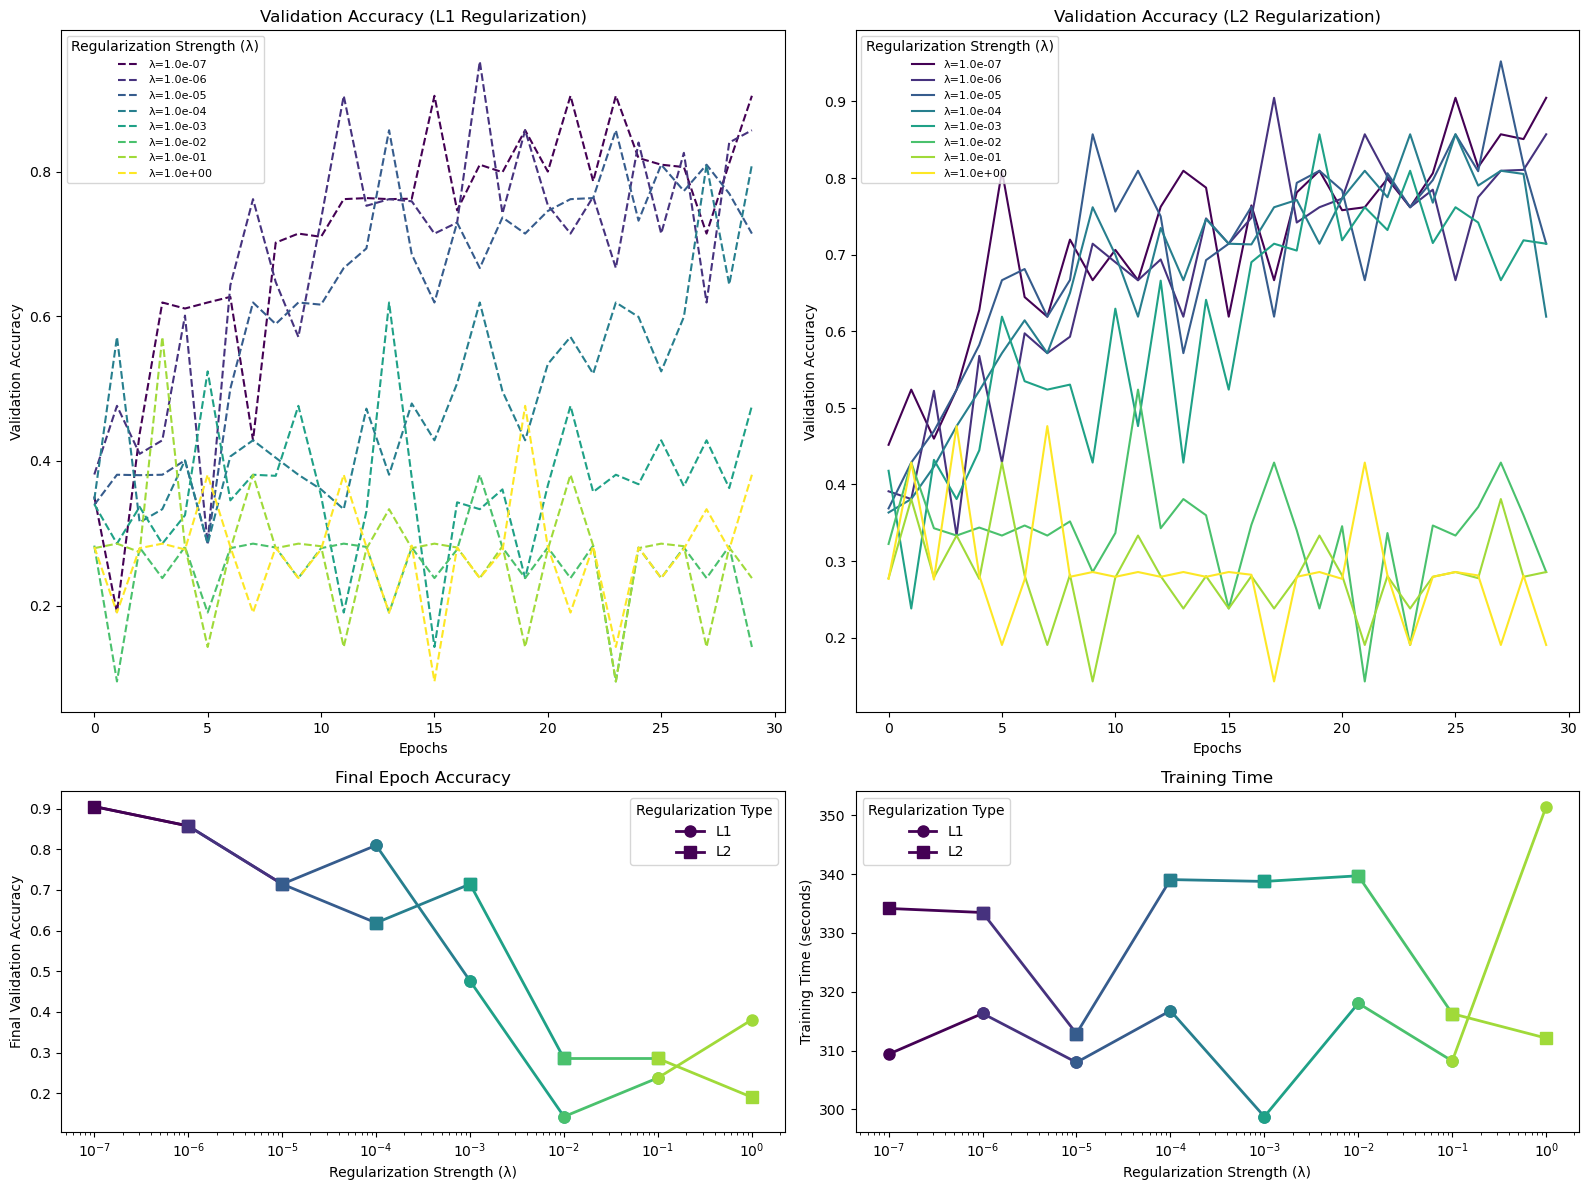

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Directory where history files are saved
save_dir = 'model_saved/regularization'

# Lists to store metrics
reg_types = ['l1', 'l2']
penalty_values = np.logspace(-7, 0, num=8).astype(np.float32)  # Consistent penalty values

# Initialize storage for validation accuracies and training times
val_accuracies = {reg_type: [] for reg_type in reg_types}
final_epoch_accuracies = {reg_type: [] for reg_type in reg_types}
training_times = {reg_type: [] for reg_type in reg_types}

# Load history for each regularization type and value
for reg_type in reg_types:
    for reg_value in penalty_values:
        reg_name = f"{reg_type}_reg_{reg_value:.1e}".replace('.', '_')
        history_path = os.path.join(save_dir, f"history_{reg_name}.json")

        if os.path.exists(history_path):
            with open(history_path, 'r') as f:
                history_data = json.load(f)
                val_accuracies[reg_type].append(history_data['val_accuracy'])
                final_epoch_accuracies[reg_type].append(history_data['val_accuracy'][-1])
                training_times[reg_type].append(history_data['training_time'])
        else:
            print(f"No history found for {reg_type} regularization with lambda={reg_value}")

# Colors for different penalty values
colors = viridis(np.linspace(0, 1, len(penalty_values)))

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'height_ratios': [2, 1]})

# Top-left: Validation accuracy for L1
for j, reg_value in enumerate(penalty_values):
    axes[0, 0].plot(val_accuracies['l1'][j], linestyle='--', color=colors[j], label=f"λ={reg_value:.1e}")
axes[0, 0].set_title("Validation Accuracy (L1 Regularization)")
axes[0, 0].set_xlabel("Epochs")
axes[0, 0].set_ylabel("Validation Accuracy")
axes[0, 0].legend(title="Regularization Strength (λ)", fontsize=8, loc='best')

# Top-right: Validation accuracy for L2
for j, reg_value in enumerate(penalty_values):
    axes[0, 1].plot(val_accuracies['l2'][j], linestyle='-', color=colors[j], label=f"λ={reg_value:.1e}")
axes[0, 1].set_title("Validation Accuracy (L2 Regularization)")
axes[0, 1].set_xlabel("Epochs")
axes[0, 1].set_ylabel("Validation Accuracy")
axes[0, 1].legend(title="Regularization Strength (λ)", fontsize=8, loc='best')

# Bottom-left: Final epoch accuracy (viridis-colored)
for i in range(len(penalty_values) - 1):
    axes[1, 0].plot(
        penalty_values[i:i + 2],
        final_epoch_accuracies['l1'][i:i + 2],
        color=colors[i],
        marker='o',
        linewidth=2,
        markersize=8,
        label='L1' if i == 0 else "")
    axes[1, 0].plot(
        penalty_values[i:i + 2],
        final_epoch_accuracies['l2'][i:i + 2],
        color=colors[i],
        marker='s',
        linewidth=2,
        markersize=8,
        label='L2' if i == 0 else "")
axes[1, 0].set_xscale('log')
axes[1, 0].set_title("Final Epoch Accuracy")
axes[1, 0].set_xlabel("Regularization Strength (λ)")
axes[1, 0].set_ylabel("Final Validation Accuracy")
axes[1, 0].legend(title="Regularization Type", fontsize=10, loc='best')

# Bottom-right: Training time (viridis-colored)
for i in range(len(penalty_values) - 1):
    axes[1, 1].plot(
        penalty_values[i:i + 2],
        training_times['l1'][i:i + 2],
        color=colors[i],
        marker='o',
        linewidth=2,
        markersize=8,
        label='L1' if i == 0 else "")
    axes[1, 1].plot(
        penalty_values[i:i + 2],
        training_times['l2'][i:i + 2],
        color=colors[i],
        marker='s',
        linewidth=2,
        markersize=8,
        label='L2' if i == 0 else "")
axes[1, 1].set_xscale('log')
axes[1, 1].set_title("Training Time")
axes[1, 1].set_xlabel("Regularization Strength (λ)")
axes[1, 1].set_ylabel("Training Time (seconds)")
axes[1, 1].legend(title="Regularization Type", fontsize=10, loc='best')

plt.tight_layout()
plt.show()


# References

Check later to update this for consistency.

[1] Data Augmentation: [Medium Article](https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9)

[2] Image processing for medical diagnosis using CNN - P Arena, A Basile, M Bucolo, L Fortuna - Nuclear Instruments and Methods, 2003 - Elsevier.

[3] Documentation of `ImageDataGenerator` from `keras`: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

[4] Data Augmentation IBM Article: https://www.ibm.com/topics/data-augmentation

[5] Data Augmentation DataCamp Article: https://www.datacamp.com/tutorial/complete-guide-data-augmentation

[6] Data Augmentation Wikipedia Article: https://en.wikipedia.org/wiki/Data_augmentation

[7] Ramachandran, Prajit; Barret, Zoph; Quoc, V. Le (October 16, 2017). "Searching for Activation Functions". arXiv:1710.05941 [cs.NE].

[8] Xavier Glorot; Antoine Bordes; Yoshua Bengio (2011). Deep sparse rectifier neural networks (PDF). AISTATS. Rectifier and softplus activation functions. The second one is a smooth version of the first.

[9] László Tóth (2013). Phone Recognition with Deep Sparse Rectifier Neural Networks (PDF).

[10] Bhoi, Akash Kumar, et al., eds. Bio-inspired neurocomputing. Vol. 310. Berlin/Heidelberg, Germany: Springer, 2021.

[11] Householder, Alston S. (June 1941). "A theory of steady-state activity in nerve-fiber networks: I. Definitions and preliminary lemmas". The Bulletin of Mathematical Biophysics. 3 (2): 63–69. doi:10.1007/BF02478220. ISSN 0007-4985.

[12] Fukushima, K. (1969). "Visual feature extraction by a multilayered network of analog threshold elements". IEEE Transactions on Systems Science and Cybernetics. 5 (4): 322–333. doi:10.1109/TSSC.1969.300225.

[13] Why use the ReLU? https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it

[14] Wikipedia article on ReLU: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#cite_note-3

[15] Bai, Yuhan. "RELU-function and derived function review." SHS Web of Conferences. Vol. 144. EDP Sciences, 2022.

[16] History of Neural Networks: https://en.wikipedia.org/wiki/Neural_network

[17] Neural network lecture notes: https://dsbristol.github.io/dst/assets/slides/07.1-PerceptronsNeuralNets.pdf

[18] Bias neuron: https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks

[19] Convolutional neural network: https://en.wikipedia.org/wiki/Convolutional_neural_network

[20] https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

[21] https://stats.stackexchange.com/questions/233253/tensors-in-neural-network-literature-whats-the-simplest-definition-out-there

[22] Tensor notation to express backpropagation: https://dlvu.github.io/slides/dlvu.lecture02.pdf

[23] van Dyck, Leonard Elia; Kwitt, Roland; Denzler, Sebastian Jochen; Gruber, Walter Roland (2021). "Comparing Object Recognition in Humans and Deep Convolutional Neural Networks—An Eye Tracking Study". Frontiers in Neuroscience. 15: 750639. doi:10.3389/fnins.2021.750639. ISSN 1662-453X. PMC 8526843. PMID 34690686.

[24] https://svitla.com/blog/cnn-for-image-processing/

[25] https://poloclub.github.io/cnn-explainer/

[26] https://medium.com/advanced-deep-learning/cnn-operation-with-2-kernels-resulting-in-2-feature-mapsunderstanding-the-convolutional-filter-c4aad26cf32

[27] https://en.wikipedia.org/wiki/AlexNet#:~:text=AlexNet%20is%20the%20name%20of,D.

[28] https://www.geeksforgeeks.org/cnn-introduction-to-padding/

[29] ReLU origins: https://news.ycombinator.com/item?id=13338389

[30] https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks

[31] Robbins, Herbert, and Sutton Monro. "A stochastic approximation method." The annals of mathematical statistics (1951): 400-407. https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-22/issue-3/A-Stochastic-Approximation-Method/10.1214/aoms/1177729586.full

[32] https://stats.stackexchange.com/questions/230120/neural-networks-is-an-epoch-in-sgd-the-same-as-an-epoch-in-mini-batch

[33] https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/

[34] Diganta Misra (23 Aug 2019), Mish: A Self Regularized Non-Monotonic Activation Function (PDF), arXiv:1908.08681v1, retrieved 26 March 2022.

[35] https://paperswithcode.com/method/leaky-relu

[36] https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

[37] Telgarsky, Matus. "Benefits of depth in neural networks." Conference on learning theory. PMLR, 2016.

[38] https://arxiv.org/pdf/1907.03199

[39] https://proceedings.mlr.press/v49/eldan16.pdf

[40] https://openaccess.thecvf.com/content_ICCV_2019/papers/van_Dijk_How_Do_Neural_Networks_See_Depth_in_Single_Images_ICCV_2019_paper.pdf

[41] https://proceedings.neurips.cc/paper_files/paper/2019/file/0d1a9651497a38d8b1c3871c84528bd4-Paper.pdf

[42] https://openreview.net/pdf?id=B1l2bp4YwS

[43] desmos

[44] https://link.springer.com/article/10.1007/BF02551274

[45] Zhang, Saizheng, et al. "Architectural complexity measures of recurrent neural networks." Advances in neural information processing systems 29 (2016).

[46] https://arxiv.org/abs/1901.03429

[47] https://arxiv.org/abs/1905.11136

[48] https://paperswithcode.com/method/global-average-pooling